In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [14]:
t_train

array([[0.725],
       [0.15 ],
       [0.65 ],
       [0.3  ],
       [0.425],
       [0.225],
       [0.375],
       [0.8  ],
       [0.4  ],
       [0.875],
       [0.85 ],
       [0.   ],
       [0.675],
       [0.125],
       [0.275],
       [0.025],
       [0.75 ],
       [0.525],
       [0.05 ],
       [0.775],
       [0.925],
       [0.075],
       [0.9  ],
       [0.575],
       [0.825],
       [0.25 ],
       [0.55 ],
       [0.45 ],
       [0.5  ],
       [0.175],
       [0.35 ],
       [0.7  ],
       [0.95 ]])

In [15]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [16]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [17]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='fourthHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(x_)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_time, output_img)
sd2 = tf.keras.Model(input_time, output_img)
sd3 = tf.keras.Model(input_time, output_img)

In [18]:
sd1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 reshape (Reshape)           (None, 1)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 128)              256       
 se)                                                             
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 secondHiddenLayerSensor (De  (None, 128)              16512     
 nse)                                                            
                                                             

In [19]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sd1.fit(t_train, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 10ms/step - loss: 0.6305 - rmse: 0.4951
Epoch 2/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6256 - rmse: 0.4915
Epoch 3/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6212 - rmse: 0.4885
Epoch 4/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6170 - rmse: 0.4856
Epoch 5/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6127 - rmse: 0.4826
Epoch 6/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6086 - rmse: 0.4799
Epoch 7/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6048 - rmse: 0.4773
Epoch 8/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6013 - rmse: 0.4752
Epoch 9/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5977 - rmse: 0.4728
Epoch 10/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5940 - rmse: 0.4703
Epoch 11/10000
2/2 [========================

2/2 [==============================] - 0s 8ms/step - loss: 0.4647 - rmse: 0.4301
Epoch 87/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4642 - rmse: 0.4307
Epoch 88/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4639 - rmse: 0.4316
Epoch 89/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4605 - rmse: 0.4289
Epoch 90/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4587 - rmse: 0.4281
Epoch 91/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4573 - rmse: 0.4276
Epoch 92/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4577 - rmse: 0.4294
Epoch 93/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4560 - rmse: 0.4285
Epoch 94/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4528 - rmse: 0.4260
Epoch 95/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4529 - rmse: 0.4274
Epoch 96/10000
2/2 [==============================]

2/2 [==============================] - 0s 9ms/step - loss: 0.3212 - rmse: 0.3433
Epoch 171/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3201 - rmse: 0.3428
Epoch 172/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3179 - rmse: 0.3408
Epoch 173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3166 - rmse: 0.3399
Epoch 174/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3143 - rmse: 0.3376
Epoch 175/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3121 - rmse: 0.3355
Epoch 176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3113 - rmse: 0.3354
Epoch 177/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3088 - rmse: 0.3328
Epoch 178/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3067 - rmse: 0.3307
Epoch 179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3050 - rmse: 0.3293
Epoch 180/10000
2/2 [===================

2/2 [==============================] - 0s 9ms/step - loss: 0.1849 - rmse: 0.1852
Epoch 255/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1837 - rmse: 0.1832
Epoch 256/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1818 - rmse: 0.1795
Epoch 257/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1825 - rmse: 0.1828
Epoch 258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1799 - rmse: 0.1769
Epoch 259/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1783 - rmse: 0.1737
Epoch 260/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1792 - rmse: 0.1778
Epoch 261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1761 - rmse: 0.1702
Epoch 262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1757 - rmse: 0.1705
Epoch 263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1737 - rmse: 0.1660
Epoch 264/10000
2/2 [=====================

2/2 [==============================] - 0s 9ms/step - loss: 0.1202 - rmse: 0.0744
Epoch 339/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1187 - rmse: 0.0661
Epoch 340/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1181 - rmse: 0.0638
Epoch 341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1179 - rmse: 0.0650
Epoch 342/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1170 - rmse: 0.0610
Epoch 343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1169 - rmse: 0.0632
Epoch 344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1180 - rmse: 0.0736
Epoch 345/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1165 - rmse: 0.0652
Epoch 346/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1158 - rmse: 0.0621
Epoch 347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1151 - rmse: 0.0595
Epoch 348/10000
2/2 [======================

2/2 [==============================] - 0s 10ms/step - loss: 0.0901 - rmse: 0.0346
Epoch 423/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0914 - rmse: 0.0518
Epoch 424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0899 - rmse: 0.0386
Epoch 425/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0892 - rmse: 0.0329
Epoch 426/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0887 - rmse: 0.0292
Epoch 427/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0887 - rmse: 0.0327
Epoch 428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0884 - rmse: 0.0318
Epoch 429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0885 - rmse: 0.0375
Epoch 430/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0878 - rmse: 0.0310
Epoch 431/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0874 - rmse: 0.0287
Epoch 432/10000
2/2 [====================

2/2 [==============================] - 0s 10ms/step - loss: 0.0709 - rmse: 0.0317
Epoch 507/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0701 - rmse: 0.0198
Epoch 508/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0702 - rmse: 0.0263
Epoch 509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0700 - rmse: 0.0257
Epoch 510/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0710 - rmse: 0.0431
Epoch 511/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0699 - rmse: 0.0321
Epoch 512/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0690 - rmse: 0.0177
Epoch 513/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0690 - rmse: 0.0226
Epoch 514/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0697 - rmse: 0.0362
Epoch 515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0693 - rmse: 0.0338
Epoch 516/10000
2/2 [=================

2/2 [==============================] - 0s 9ms/step - loss: 0.0568 - rmse: 0.0318
Epoch 591/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0568 - rmse: 0.0341
Epoch 592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0565 - rmse: 0.0312
Epoch 593/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0556 - rmse: 0.0144
Epoch 594/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0554 - rmse: 0.0133
Epoch 595/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0557 - rmse: 0.0239
Epoch 596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0561 - rmse: 0.0333
Epoch 597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0564 - rmse: 0.0395
Epoch 598/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0550 - rmse: 0.0163
Epoch 599/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0556 - rmse: 0.0332
Epoch 600/10000
2/2 [=====================

2/2 [==============================] - 0s 10ms/step - loss: 0.0455 - rmse: 0.0125
Epoch 675/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0462 - rmse: 0.0309
Epoch 676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0455 - rmse: 0.0202
Epoch 677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0456 - rmse: 0.0234
Epoch 678/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0461 - rmse: 0.0342
Epoch 679/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0450 - rmse: 0.0151
Epoch 680/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0460 - rmse: 0.0355
Epoch 681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0466 - rmse: 0.0446
Epoch 682/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0448 - rmse: 0.0186
Epoch 683/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0452 - rmse: 0.0284
Epoch 684/10000
2/2 [=====================

2/2 [==============================] - 0s 8ms/step - loss: 0.0378 - rmse: 0.0137
Epoch 759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0381 - rmse: 0.0238
Epoch 760/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0386 - rmse: 0.0326
Epoch 761/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0375 - rmse: 0.0097
Epoch 762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0380 - rmse: 0.0259
Epoch 763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0381 - rmse: 0.0294
Epoch 764/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0382 - rmse: 0.0324
Epoch 765/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0385 - rmse: 0.0379
Epoch 766/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0379 - rmse: 0.0292
Epoch 767/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0374 - rmse: 0.0204
Epoch 768/10000
2/2 [=====================

2/2 [==============================] - 0s 8ms/step - loss: 0.0317 - rmse: 0.0107
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0319 - rmse: 0.0203
Epoch 844/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0320 - rmse: 0.0244
Epoch 845/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0318 - rmse: 0.0214
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0320 - rmse: 0.0261
Epoch 847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0315 - rmse: 0.0160
Epoch 848/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0317 - rmse: 0.0226
Epoch 849/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0313 - rmse: 0.0124
Epoch 850/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0323 - rmse: 0.0351
Epoch 851/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0319 - rmse: 0.0305
Epoch 852/10000
2/2 [====================

2/2 [==============================] - 0s 9ms/step - loss: 0.0278 - rmse: 0.0301
Epoch 927/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0271 - rmse: 0.0164
Epoch 928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0269 - rmse: 0.0117
Epoch 929/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0278 - rmse: 0.0327
Epoch 930/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0269 - rmse: 0.0137
Epoch 931/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0268 - rmse: 0.0124
Epoch 932/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0282 - rmse: 0.0407
Epoch 933/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0274 - rmse: 0.0300
Epoch 934/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0266 - rmse: 0.0111
Epoch 935/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0271 - rmse: 0.0266
Epoch 936/10000
2/2 [======================

2/2 [==============================] - 0s 8ms/step - loss: 0.0243 - rmse: 0.0348
Epoch 1011/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0235 - rmse: 0.0203
Epoch 1012/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0232 - rmse: 0.0149
Epoch 1013/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0247 - rmse: 0.0411
Epoch 1014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0232 - rmse: 0.0150
Epoch 1015/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0231 - rmse: 0.0142
Epoch 1016/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0243 - rmse: 0.0378
Epoch 1017/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0238 - rmse: 0.0316
Epoch 1018/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0232 - rmse: 0.0211
Epoch 1019/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0231 - rmse: 0.0201
Epoch 1020/10000
2/2 [============

2/2 [==============================] - 0s 9ms/step - loss: 0.0209 - rmse: 0.0283
Epoch 1094/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0202 - rmse: 0.0125
Epoch 1095/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0217 - rmse: 0.0406
Epoch 1096/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0211 - rmse: 0.0331
Epoch 1097/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0204 - rmse: 0.0203
Epoch 1098/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0200 - rmse: 0.0087
Epoch 1099/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0208 - rmse: 0.0299
Epoch 1100/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0200 - rmse: 0.0122
Epoch 1101/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0209 - rmse: 0.0335
Epoch 1102/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0220 - rmse: 0.0467
Epoch 1103/10000
2/2 [==========

2/2 [==============================] - 0s 9ms/step - loss: 0.0186 - rmse: 0.0331
Epoch 1177/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0179 - rmse: 0.0202
Epoch 1178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0182 - rmse: 0.0266
Epoch 1179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0177 - rmse: 0.0166
Epoch 1180/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0181 - rmse: 0.0264
Epoch 1181/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0181 - rmse: 0.0266
Epoch 1182/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0187 - rmse: 0.0359
Epoch 1183/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0190 - rmse: 0.0402
Epoch 1184/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0177 - rmse: 0.0201
Epoch 1185/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0195 - rmse: 0.0468
Epoch 1186/10000
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 0.0157 - rmse: 0.0180
Epoch 1260/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0157 - rmse: 0.0194
Epoch 1261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0161 - rmse: 0.0278
Epoch 1262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0160 - rmse: 0.0269
Epoch 1263/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0159 - rmse: 0.0240
Epoch 1264/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0160 - rmse: 0.0264
Epoch 1265/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0159 - rmse: 0.0256
Epoch 1266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0155 - rmse: 0.0167
Epoch 1267/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0163 - rmse: 0.0334
Epoch 1268/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0158 - rmse: 0.0258
Epoch 1269/10000
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 0.0157 - rmse: 0.0471
Epoch 1343/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0139 - rmse: 0.0214
Epoch 1344/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0138 - rmse: 0.0187
Epoch 1345/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0147 - rmse: 0.0354
Epoch 1346/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0138 - rmse: 0.0180
Epoch 1347/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0145 - rmse: 0.0337
Epoch 1348/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0137 - rmse: 0.0175
Epoch 1349/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0145 - rmse: 0.0343
Epoch 1350/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0137 - rmse: 0.0174
Epoch 1351/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0135 - rmse: 0.0148
Epoch 1352/10000
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 0.0128 - rmse: 0.0296
Epoch 1426/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0121 - rmse: 0.0139
Epoch 1427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0123 - rmse: 0.0214
Epoch 1428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0121 - rmse: 0.0163
Epoch 1429/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0137 - rmse: 0.0434
Epoch 1430/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0119 - rmse: 0.0101
Epoch 1431/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0128 - rmse: 0.0317
Epoch 1432/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0119 - rmse: 0.0111
Epoch 1433/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0119 - rmse: 0.0126
Epoch 1434/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0122 - rmse: 0.0222
Epoch 1435/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.0115 - rmse: 0.0323
Epoch 1509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0106 - rmse: 0.0136
Epoch 1510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0111 - rmse: 0.0253
Epoch 1511/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0116 - rmse: 0.0338
Epoch 1512/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0106 - rmse: 0.0144
Epoch 1513/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0114 - rmse: 0.0320
Epoch 1514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0122 - rmse: 0.0431
Epoch 1515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0113 - rmse: 0.0305
Epoch 1516/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0120 - rmse: 0.0412
Epoch 1517/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0111 - rmse: 0.0268
Epoch 1518/10000
2/2 [============

2/2 [==============================] - 0s 9ms/step - loss: 0.0093 - rmse: 0.0078
Epoch 1592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0093 - rmse: 0.0111
Epoch 1593/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0099 - rmse: 0.0265
Epoch 1594/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0213
Epoch 1595/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0097 - rmse: 0.0241
Epoch 1596/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0095 - rmse: 0.0183
Epoch 1597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0170
Epoch 1598/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0164
Epoch 1599/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0108
Epoch 1600/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0107 - rmse: 0.0401
Epoch 1601/10000
2/2 [============

2/2 [==============================] - 0s 9ms/step - loss: 0.0087 - rmse: 0.0237
Epoch 1675/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0082 - rmse: 0.0117
Epoch 1676/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0091 - rmse: 0.0319
Epoch 1677/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0102
Epoch 1678/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0091 - rmse: 0.0318
Epoch 1679/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0087 - rmse: 0.0249
Epoch 1680/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0243
Epoch 1681/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0241
Epoch 1682/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0096
Epoch 1683/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0086 - rmse: 0.0249
Epoch 1684/10000
2/2 [==========

2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0147
Epoch 1758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0141
Epoch 1759/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0077 - rmse: 0.0249
Epoch 1760/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0156
Epoch 1761/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0167
Epoch 1762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0232
Epoch 1763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0286
Epoch 1764/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0168
Epoch 1765/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0343
Epoch 1766/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0090 - rmse: 0.0442
Epoch 1767/10000
2/2 [==========

2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0298
Epoch 1841/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0064 - rmse: 0.0149
Epoch 1842/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0063 - rmse: 0.0074
Epoch 1843/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0076 - rmse: 0.0370
Epoch 1844/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0071 - rmse: 0.0310
Epoch 1845/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0071 - rmse: 0.0299
Epoch 1846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0425
Epoch 1847/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0315
Epoch 1848/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0401
Epoch 1849/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0279
Epoch 1850/10000
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0201
Epoch 1924/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0156
Epoch 1925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0334
Epoch 1926/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0441
Epoch 1927/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0323
Epoch 1928/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0307
Epoch 1929/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0165
Epoch 1930/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0219
Epoch 1931/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0222
Epoch 1932/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0159
Epoch 1933/10000
2/2 [============

2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0454
Epoch 2007/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0439
Epoch 2008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0169
Epoch 2009/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0266
Epoch 2010/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0330
Epoch 2011/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0196
Epoch 2012/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0239
Epoch 2013/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0254
Epoch 2014/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0058 - rmse: 0.0335
Epoch 2015/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0286
Epoch 2016/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0296
Epoch 2090/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0281
Epoch 2091/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0352
Epoch 2092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0242
Epoch 2093/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0275
Epoch 2094/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0222
Epoch 2095/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0292
Epoch 2096/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0213
Epoch 2097/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0496
Epoch 2098/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0309
Epoch 2099/10000
2/2 [============

2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0151
Epoch 2173/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0211
Epoch 2174/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0300
Epoch 2175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0078
Epoch 2176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0261
Epoch 2177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0089
Epoch 2178/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0098
Epoch 2179/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0429
Epoch 2180/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0211
Epoch 2181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0164
Epoch 2182/10000
2/2 [===========

2/2 [==============================] - 0s 15ms/step - loss: 0.0035 - rmse: 0.0211
Epoch 2256/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0039 - rmse: 0.0286
Epoch 2257/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0031 - rmse: 0.0081
Epoch 2258/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0040 - rmse: 0.0312
Epoch 2259/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0032 - rmse: 0.0144
Epoch 2260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0309
Epoch 2261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0296
Epoch 2262/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0369
Epoch 2263/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0457
Epoch 2264/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0296
Epoch 2265/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0398
Epoch 2339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0222
Epoch 2340/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0233
Epoch 2341/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0168
Epoch 2342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0314
Epoch 2343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0192
Epoch 2344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0185
Epoch 2345/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0080
Epoch 2346/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0212
Epoch 2347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0476
Epoch 2348/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0251
Epoch 2422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0225
Epoch 2423/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0193
Epoch 2424/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0331
Epoch 2425/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0469
Epoch 2426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0157
Epoch 2427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0110
Epoch 2428/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0197
Epoch 2429/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0178
Epoch 2430/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0307
Epoch 2431/10000
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0148
Epoch 2505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0185
Epoch 2506/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0130
Epoch 2507/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0215
Epoch 2508/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0388
Epoch 2509/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0329
Epoch 2510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0148
Epoch 2511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0198
Epoch 2512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0117
Epoch 2513/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0130
Epoch 2514/10000
2/2 [==========

2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0123
Epoch 2588/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0179
Epoch 2589/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0189
Epoch 2590/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0323
Epoch 2591/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0088
Epoch 2592/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0065
Epoch 2593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0165
Epoch 2594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0106
Epoch 2595/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0307
Epoch 2596/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0233
Epoch 2597/10000
2/2 [==========

2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0467
Epoch 2671/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0300
Epoch 2672/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0140
Epoch 2673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0130
Epoch 2674/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0293
Epoch 2675/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0149
Epoch 2676/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0208
Epoch 2677/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0335
Epoch 2678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0146
Epoch 2679/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0161
Epoch 2680/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0135
Epoch 2754/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0122
Epoch 2755/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0019 - rmse: 0.0273
Epoch 2756/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0014 - rmse: 0.0147
Epoch 2757/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0124
Epoch 2758/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0017 - rmse: 0.0223
Epoch 2759/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0017 - rmse: 0.0234
Epoch 2760/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0115
Epoch 2761/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0301
Epoch 2762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0149
Epoch 2763/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0223
Epoch 2837/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0216
Epoch 2838/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0266
Epoch 2839/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0266
Epoch 2840/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0086
Epoch 2841/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0130
Epoch 2842/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0155
Epoch 2843/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0128
Epoch 2844/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0183
Epoch 2845/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0098
Epoch 2846/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0211
Epoch 2920/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2752e-04 - rmse: 0.0084
Epoch 2921/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.4045e-04 - rmse: 0.0093
Epoch 2922/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0400
Epoch 2923/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0274
Epoch 2924/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0209
Epoch 2925/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0396
Epoch 2926/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0285
Epoch 2927/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0477
Epoch 2928/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0156
Epoch 2929/10000
2/2 [====

2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0301
Epoch 3002/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0166
Epoch 3003/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0166
Epoch 3004/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0294
Epoch 3005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0232
Epoch 3006/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0305
Epoch 3007/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.8230e-04 - rmse: 0.0162
Epoch 3008/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0293
Epoch 3009/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0211
Epoch 3010/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8191e-04 - rmse: 0.0163
Epoch 3011/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0438
Epoch 3084/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0440
Epoch 3085/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0311
Epoch 3086/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0334
Epoch 3087/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0243
Epoch 3088/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0271
Epoch 3089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0257
Epoch 3090/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0397
Epoch 3091/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0237
Epoch 3092/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.2095e-04 - rmse: 0.0103
Epoch 3093/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0283
Epoch 3165/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.5538e-04 - rmse: 0.0178
Epoch 3166/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5106e-04 - rmse: 0.0204
Epoch 3167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0314
Epoch 3168/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.3226e-04 - rmse: 0.0140
Epoch 3169/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0441
Epoch 3170/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0307
Epoch 3171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0334
Epoch 3172/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5876e-04 - rmse: 0.0207
Epoch 3173/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.1290e-04 - rmse: 0.0135
Epoch 3174/10

2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0284
Epoch 3246/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0309
Epoch 3247/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0285
Epoch 3248/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2257e-04 - rmse: 0.0126
Epoch 3249/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0416
Epoch 3250/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.9660e-04 - rmse: 0.0154
Epoch 3251/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9709e-04 - rmse: 0.0183
Epoch 3252/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0293
Epoch 3253/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.9927e-04 - rmse: 0.0119
Epoch 3254/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.3469e-04 - rmse: 0.0194
Epoch 3255/1

2/2 [==============================] - 0s 10ms/step - loss: 8.1858e-04 - rmse: 0.0203
Epoch 3327/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.3643e-04 - rmse: 0.0230
Epoch 3328/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4521e-04 - rmse: 0.0232
Epoch 3329/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5764e-04 - rmse: 0.0123
Epoch 3330/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.7366e-04 - rmse: 0.0192
Epoch 3331/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.6776e-04 - rmse: 0.0162
Epoch 3332/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0325
Epoch 3333/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0341
Epoch 3334/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0292
Epoch 3335/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.1269e-04 - rmse: 0.0144
Epoch

2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0282
Epoch 3408/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0321
Epoch 3409/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0429
Epoch 3410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0290
Epoch 3411/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0410
Epoch 3412/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.8469e-04 - rmse: 0.0114
Epoch 3413/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.9537e-04 - rmse: 0.0210
Epoch 3414/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0430
Epoch 3415/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0321
Epoch 3416/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4491e-04 - rmse: 0.0171
Epoch 3417/10000
2/2 [

2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0468
Epoch 3489/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0332
Epoch 3490/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.1920e-04 - rmse: 0.0174
Epoch 3491/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0291
Epoch 3492/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.5779e-04 - rmse: 0.0185
Epoch 3493/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6761e-04 - rmse: 0.0188
Epoch 3494/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2262e-04 - rmse: 0.0202
Epoch 3495/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0326
Epoch 3496/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0289
Epoch 3497/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 3498/10000


2/2 [==============================] - 0s 21ms/step - loss: 4.9168e-04 - rmse: 0.0145
Epoch 3570/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.3611e-04 - rmse: 0.0213
Epoch 3571/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.9705e-04 - rmse: 0.0204
Epoch 3572/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 3573/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5234e-04 - rmse: 0.0193
Epoch 3574/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0301
Epoch 3575/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9208e-04 - rmse: 0.0146
Epoch 3576/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.3936e-04 - rmse: 0.0190
Epoch 3577/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 3578/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0346
Epoch 35

2/2 [==============================] - 0s 10ms/step - loss: 4.3109e-04 - rmse: 0.0133
Epoch 3651/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2632e-04 - rmse: 0.0085
Epoch 3652/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2310e-04 - rmse: 0.0083
Epoch 3653/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9604e-04 - rmse: 0.0156
Epoch 3654/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.9956e-04 - rmse: 0.0068
Epoch 3655/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.0983e-04 - rmse: 0.0189
Epoch 3656/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.4432e-04 - rmse: 0.0243
Epoch 3657/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0397
Epoch 3658/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.1881e-04 - rmse: 0.0259
Epoch 3659/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.3879e-04 - rmse: 0.0

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0323
Epoch 3732/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0466
Epoch 3733/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3124e-04 - rmse: 0.0200
Epoch 3734/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.8953e-04 - rmse: 0.0256
Epoch 3735/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.2960e-04 - rmse: 0.0199
Epoch 3736/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 3737/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.7280e-04 - rmse: 0.0272
Epoch 3738/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6828e-04 - rmse: 0.0117
Epoch 3739/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 3740/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2881e-04 - rmse: 0.0223
Epoch 3741/

2/2 [==============================] - 0s 9ms/step - loss: 9.6208e-04 - rmse: 0.0274
Epoch 3813/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5800e-04 - rmse: 0.0158
Epoch 3814/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3445e-04 - rmse: 0.0112
Epoch 3815/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0320
Epoch 3816/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 3817/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.3842e-04 - rmse: 0.0182
Epoch 3818/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0450
Epoch 3819/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.3897e-04 - rmse: 0.0231
Epoch 3820/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0296
Epoch 3821/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0327
Epoch 3822/1

2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0314
Epoch 3894/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0336
Epoch 3895/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0438
Epoch 3896/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.2029e-04 - rmse: 0.0230
Epoch 3897/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.8848e-04 - rmse: 0.0098
Epoch 3898/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5765e-04 - rmse: 0.0216
Epoch 3899/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0429
Epoch 3900/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0306
Epoch 3901/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8563e-04 - rmse: 0.0171
Epoch 3902/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6092e-04 - rmse: 0.0130
Epoch 3903/1

2/2 [==============================] - 0s 10ms/step - loss: 3.1492e-04 - rmse: 0.0118
Epoch 3975/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.8151e-04 - rmse: 0.0225
Epoch 3976/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.7112e-04 - rmse: 0.0199
Epoch 3977/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0308
Epoch 3978/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7421e-04 - rmse: 0.0100
Epoch 3979/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.1572e-04 - rmse: 0.0064
Epoch 3980/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.6903e-04 - rmse: 0.0222
Epoch 3981/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7979e-04 - rmse: 0.0143
Epoch 3982/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 3983/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6340e-04 - rmse: 0.0138
Epo

2/2 [==============================] - 0s 9ms/step - loss: 3.2345e-04 - rmse: 0.0126
Epoch 4055/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.5493e-04 - rmse: 0.0222
Epoch 4056/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2777e-04 - rmse: 0.0128
Epoch 4057/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.0098e-04 - rmse: 0.0232
Epoch 4058/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0466
Epoch 4059/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0723e-04 - rmse: 0.0186
Epoch 4060/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0322
Epoch 4061/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0291
Epoch 4062/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.6863e-04 - rmse: 0.0246
Epoch 4063/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.1764e-04 - rmse: 0.0188
Epoch

2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0376
Epoch 4136/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0414
Epoch 4137/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6245e-04 - rmse: 0.0175
Epoch 4138/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.2718e-04 - rmse: 0.0192
Epoch 4139/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.1505e-04 - rmse: 0.0189
Epoch 4140/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0389
Epoch 4141/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0444
Epoch 4142/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2728e-04 - rmse: 0.0165
Epoch 4143/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.8268e-04 - rmse: 0.0287
Epoch 4144/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0011 - rmse: 0.0300
Epoch 4145/1

2/2 [==============================] - 0s 8ms/step - loss: 3.6430e-04 - rmse: 0.0148
Epoch 4217/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.7025e-04 - rmse: 0.0287
Epoch 4218/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0304
Epoch 4219/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.9987e-04 - rmse: 0.0275
Epoch 4220/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.7523e-04 - rmse: 0.0270
Epoch 4221/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7376e-04 - rmse: 0.0113
Epoch 4222/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0430
Epoch 4223/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.2572e-04 - rmse: 0.0168
Epoch 4224/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 4225/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0408
Epoch 422

2/2 [==============================] - 0s 11ms/step - loss: 9.3278e-04 - rmse: 0.0282
Epoch 4298/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9372e-04 - rmse: 0.0075
Epoch 4299/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4855e-04 - rmse: 0.0203
Epoch 4300/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.5162e-04 - rmse: 0.0248
Epoch 4301/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0424
Epoch 4302/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 4303/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9152e-04 - rmse: 0.0074
Epoch 4304/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6705e-04 - rmse: 0.0230
Epoch 4305/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2199e-04 - rmse: 0.0093
Epoch 4306/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0427
Epoc

2/2 [==============================] - 0s 8ms/step - loss: 2.3784e-04 - rmse: 0.0106
Epoch 4378/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5220e-04 - rmse: 0.0113
Epoch 4379/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 4380/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3870e-04 - rmse: 0.0285
Epoch 4381/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9476e-04 - rmse: 0.0193
Epoch 4382/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7384e-04 - rmse: 0.0122
Epoch 4383/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.6442e-04 - rmse: 0.0233
Epoch 4384/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.3031e-04 - rmse: 0.0266
Epoch 4385/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9036e-04 - rmse: 0.0129
Epoch 4386/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2926e-04 - rmse: 0.02

2/2 [==============================] - 0s 15ms/step - loss: 6.0567e-04 - rmse: 0.0221
Epoch 4459/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7416e-04 - rmse: 0.0125
Epoch 4460/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.4969e-04 - rmse: 0.0115
Epoch 4461/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0324
Epoch 4462/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 4463/10000
2/2 [==============================] - 0s 20ms/step - loss: 3.7502e-04 - rmse: 0.0161
Epoch 4464/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5760e-04 - rmse: 0.0155
Epoch 4465/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.3775e-04 - rmse: 0.0287
Epoch 4466/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.2391e-04 - rmse: 0.0176
Epoch 4467/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1280e-04 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 3.2108e-04 - rmse: 0.0144
Epoch 4540/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.5061e-04 - rmse: 0.0272
Epoch 4541/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.5400e-04 - rmse: 0.0272
Epoch 4542/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.8263e-04 - rmse: 0.0295
Epoch 4543/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.1966e-04 - rmse: 0.0225
Epoch 4544/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.8216e-04 - rmse: 0.0239
Epoch 4545/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0430
Epoch 4546/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.9354e-04 - rmse: 0.0297
Epoch 4547/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8850e-04 - rmse: 0.0167
Epoch 4548/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0987e-04 - rmse: 0.02

2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 4621/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0349
Epoch 4622/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9035e-04 - rmse: 0.0168
Epoch 4623/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8414e-04 - rmse: 0.0132
Epoch 4624/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5697e-04 - rmse: 0.0234
Epoch 4625/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.6000e-04 - rmse: 0.0292
Epoch 4626/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.0771e-04 - rmse: 0.0200
Epoch 4627/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4438e-04 - rmse: 0.0116
Epoch 4628/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0328
Epoch 4629/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.2904e-04 - rmse: 0.0228
Epoch

2/2 [==============================] - 0s 9ms/step - loss: 5.8897e-04 - rmse: 0.0221
Epoch 4702/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0347
Epoch 4703/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 4704/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.8278e-04 - rmse: 0.0297
Epoch 4705/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.1563e-04 - rmse: 0.0227
Epoch 4706/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1293e-04 - rmse: 0.0285
Epoch 4707/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0324
Epoch 4708/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0343
Epoch 4709/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4245e-04 - rmse: 0.0185
Epoch 4710/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.1651e-04 - rmse: 0.0248
Epoch 4

2/2 [==============================] - 0s 10ms/step - loss: 2.8126e-04 - rmse: 0.0136
Epoch 4783/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.8353e-04 - rmse: 0.0137
Epoch 4784/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 4785/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.5770e-04 - rmse: 0.0257
Epoch 4786/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.7622e-04 - rmse: 0.0279
Epoch 4787/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.9176e-04 - rmse: 0.0282
Epoch 4788/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.2937e-04 - rmse: 0.0231
Epoch 4789/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3162e-04 - rmse: 0.0060
Epoch 4790/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8259e-04 - rmse: 0.0093
Epoch 4791/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7731e-04 - rmse: 0.01

2/2 [==============================] - 0s 11ms/step - loss: 1.8988e-04 - rmse: 0.0100
Epoch 4863/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5420e-04 - rmse: 0.0080
Epoch 4864/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.3812e-04 - rmse: 0.0212
Epoch 4865/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.6821e-04 - rmse: 0.0279
Epoch 4866/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.2165e-04 - rmse: 0.0182
Epoch 4867/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4811e-04 - rmse: 0.0076
Epoch 4868/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0579e-04 - rmse: 0.0108
Epoch 4869/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0022 - rmse: 0.0458
Epoch 4870/10000
2/2 [==============================] - 0s 17ms/step - loss: 3.0959e-04 - rmse: 0.0149
Epoch 4871/10000
2/2 [==============================] - 0s 17ms/step - loss: 1.8749e-04 - rmse: 0

2/2 [==============================] - 0s 11ms/step - loss: 2.9623e-04 - rmse: 0.0145
Epoch 4944/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7713e-04 - rmse: 0.0243
Epoch 4945/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3112e-04 - rmse: 0.0186
Epoch 4946/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4118e-04 - rmse: 0.0125
Epoch 4947/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4702e-04 - rmse: 0.0190
Epoch 4948/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5055e-04 - rmse: 0.0080
Epoch 4949/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5086e-04 - rmse: 0.0081
Epoch 4950/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7019e-04 - rmse: 0.0262
Epoch 4951/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9354e-04 - rmse: 0.0284
Epoch 4952/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.1174e-04 - rmse:

2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 5024/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0456
Epoch 5025/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1451e-04 - rmse: 0.0271
Epoch 5026/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.8583e-04 - rmse: 0.0175
Epoch 5027/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0061e-04 - rmse: 0.0110
Epoch 5028/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6090e-04 - rmse: 0.0167
Epoch 5029/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.6583e-04 - rmse: 0.0262
Epoch 5030/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0308
Epoch 5031/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.1836e-04 - rmse: 0.0209
Epoch 5032/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6044e-04 - rmse: 0.0090
Epoc

2/2 [==============================] - 0s 9ms/step - loss: 9.8027e-05 - rmse: 0.0047
Epoch 5104/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4227e-04 - rmse: 0.0082
Epoch 5105/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.3453e-04 - rmse: 0.0293
Epoch 5106/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.4937e-04 - rmse: 0.0240
Epoch 5107/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 5108/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5172e-04 - rmse: 0.0218
Epoch 5109/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6187e-04 - rmse: 0.0093
Epoch 5110/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9611e-04 - rmse: 0.0179
Epoch 5111/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2446e-04 - rmse: 0.0070
Epoch 5112/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0439


2/2 [==============================] - 0s 10ms/step - loss: 8.8478e-04 - rmse: 0.0285
Epoch 5184/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.3806e-04 - rmse: 0.0163
Epoch 5185/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4169e-04 - rmse: 0.0083
Epoch 5186/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.3240e-04 - rmse: 0.0161
Epoch 5187/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0308
Epoch 5188/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.7606e-04 - rmse: 0.0201
Epoch 5189/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2085e-04 - rmse: 0.0070
Epoch 5190/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7905e-04 - rmse: 0.0175
Epoch 5191/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3429e-04 - rmse: 0.0079
Epoch 5192/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1523e-04 - rmse: 0.0

2/2 [==============================] - 0s 17ms/step - loss: 1.5096e-04 - rmse: 0.0092
Epoch 5264/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.5298e-04 - rmse: 0.0093
Epoch 5265/10000
2/2 [==============================] - 0s 21ms/step - loss: 0.0010 - rmse: 0.0308
Epoch 5266/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.5593e-04 - rmse: 0.0170
Epoch 5267/10000
2/2 [==============================] - 0s 15ms/step - loss: 7.2190e-04 - rmse: 0.0256
Epoch 5268/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 5269/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.3449e-04 - rmse: 0.0259
Epoch 5270/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3667e-04 - rmse: 0.0165
Epoch 5271/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 5272/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 5

2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0457
Epoch 5345/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.0968e-04 - rmse: 0.0268
Epoch 5346/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6320e-04 - rmse: 0.0164
Epoch 5347/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1399e-04 - rmse: 0.0268
Epoch 5348/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9910e-04 - rmse: 0.0103
Epoch 5349/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.9605e-04 - rmse: 0.0224
Epoch 5350/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.2174e-04 - rmse: 0.0181
Epoch 5351/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.1282e-04 - rmse: 0.0205
Epoch 5352/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 5353/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.9556e-04 - rmse: 0.0201
Ep

2/2 [==============================] - 0s 8ms/step - loss: 1.3232e-04 - rmse: 0.0072
Epoch 5425/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2583e-04 - rmse: 0.0157
Epoch 5426/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0309
Epoch 5427/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 5428/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0321e-04 - rmse: 0.0287
Epoch 5429/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7700e-04 - rmse: 0.0099
Epoch 5430/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 5431/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 5432/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0343
Epoch 5433/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0707e-04 - rmse: 0.0181
Epoch 5434/10

2/2 [==============================] - 0s 9ms/step - loss: 9.7315e-04 - rmse: 0.0300
Epoch 5505/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2494e-04 - rmse: 0.0073
Epoch 5506/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5375e-04 - rmse: 0.0168
Epoch 5507/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 5508/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 5509/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4092e-04 - rmse: 0.0192
Epoch 5510/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1206e-04 - rmse: 0.0290
Epoch 5511/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 5512/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8734e-04 - rmse: 0.0108
Epoch 5513/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.1661e-04 - rmse: 0.0211
Epoc

2/2 [==============================] - 0s 11ms/step - loss: 8.0580e-05 - rmse: 0.0039
Epoch 5585/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.0727e-04 - rmse: 0.0156
Epoch 5586/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 5587/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 5588/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2349e-04 - rmse: 0.0077
Epoch 5589/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 5590/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.9548e-04 - rmse: 0.0208
Epoch 5591/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5363e-05 - rmse: 0.0056
Epoch 5592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 5593/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3843e-04 - rmse: 0.0086
Epoch 5594

2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 5665/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2035e-04 - rmse: 0.0161
Epoch 5666/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7686e-04 - rmse: 0.0178
Epoch 5667/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 5668/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 5669/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 5670/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8610e-04 - rmse: 0.0181
Epoch 5671/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.5294e-04 - rmse: 0.0139
Epoch 5672/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7893e-04 - rmse: 0.0109
Epoch 5673/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0489e-04 - rmse: 0.0121
Epoch 56

2/2 [==============================] - 0s 14ms/step - loss: 2.0321e-04 - rmse: 0.0121
Epoch 5745/10000
2/2 [==============================] - 0s 15ms/step - loss: 5.1444e-04 - rmse: 0.0214
Epoch 5746/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 5747/10000
2/2 [==============================] - 0s 17ms/step - loss: 1.9655e-04 - rmse: 0.0119
Epoch 5748/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.1314e-04 - rmse: 0.0125
Epoch 5749/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.4986e-04 - rmse: 0.0222
Epoch 5750/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.4059e-04 - rmse: 0.0297
Epoch 5751/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 5752/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0470
Epoch 5753/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7448e-04 - rmse: 0.0109
Epo

Epoch 5825/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.2973e-04 - rmse: 0.0133
Epoch 5826/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2877e-04 - rmse: 0.0087
Epoch 5827/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1563e-04 - rmse: 0.0294
Epoch 5828/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.7029e-04 - rmse: 0.0148
Epoch 5829/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5754e-04 - rmse: 0.0225
Epoch 5830/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5622e-04 - rmse: 0.0224
Epoch 5831/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 5832/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3830e-04 - rmse: 0.0197
Epoch 5833/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1914e-04 - rmse: 0.0082
Epoch 5834/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.563

2/2 [==============================] - 0s 9ms/step - loss: 5.1576e-04 - rmse: 0.0216
Epoch 5906/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.3131e-04 - rmse: 0.0195
Epoch 5907/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0864e-04 - rmse: 0.0126
Epoch 5908/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4423e-04 - rmse: 0.0172
Epoch 5909/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1536e-04 - rmse: 0.0081
Epoch 5910/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.7706e-04 - rmse: 0.0113
Epoch 5911/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.7732e-04 - rmse: 0.0288
Epoch 5912/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3066e-04 - rmse: 0.0091
Epoch 5913/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.6707e-04 - rmse: 0.0286
Epoch 5914/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.4432e-04 - rmse: 

2/2 [==============================] - 0s 10ms/step - loss: 6.3657e-04 - rmse: 0.0243
Epoch 5986/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0310
Epoch 5987/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.7390e-04 - rmse: 0.0305
Epoch 5988/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5763e-04 - rmse: 0.0176
Epoch 5989/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9320e-04 - rmse: 0.0273
Epoch 5990/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8354e-04 - rmse: 0.0184
Epoch 5991/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 5992/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.5241e-04 - rmse: 0.0301
Epoch 5993/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.8433e-04 - rmse: 0.0289
Epoch 5994/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7273e-04 - rmse: 0.0150


2/2 [==============================] - 0s 9ms/step - loss: 2.1449e-04 - rmse: 0.0131
Epoch 6066/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 6067/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.7175e-04 - rmse: 0.0270
Epoch 6068/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7365e-04 - rmse: 0.0182
Epoch 6069/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.9810e-04 - rmse: 0.0292
Epoch 6070/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5942e-04 - rmse: 0.0227
Epoch 6071/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5574e-04 - rmse: 0.0106
Epoch 6072/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2790e-04 - rmse: 0.0136
Epoch 6073/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9690e-04 - rmse: 0.0213
Epoch 6074/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4017e-04 - rmse: 0.0

2/2 [==============================] - 0s 9ms/step - loss: 5.5548e-04 - rmse: 0.0227
Epoch 6146/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0461
Epoch 6147/10000
2/2 [==============================] - 0s 19ms/step - loss: 3.2715e-04 - rmse: 0.0169
Epoch 6148/10000
2/2 [==============================] - 0s 17ms/step - loss: 6.8237e-05 - rmse: 0.0051
Epoch 6149/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 6150/10000
2/2 [==============================] - 0s 17ms/step - loss: 6.8597e-04 - rmse: 0.0254
Epoch 6151/10000
2/2 [==============================] - 0s 19ms/step - loss: 5.6912e-04 - rmse: 0.0230
Epoch 6152/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.8301e-05 - rmse: 0.0051
Epoch 6153/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.0793e-04 - rmse: 0.0216
Epoch 6154/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.4985e-05 - rmse: 0.00

2/2 [==============================] - 0s 9ms/step - loss: 8.6313e-04 - rmse: 0.0287
Epoch 6226/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.9198e-04 - rmse: 0.0235
Epoch 6227/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0367e-04 - rmse: 0.0080
Epoch 6228/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0545e-04 - rmse: 0.0081
Epoch 6229/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 6230/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1888e-04 - rmse: 0.0134
Epoch 6231/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.8842e-04 - rmse: 0.0308
Epoch 6232/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.8185e-04 - rmse: 0.0307
Epoch 6233/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5103e-05 - rmse: 0.0040
Epoch 6234/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3035e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 5.8446e-05 - rmse: 0.0045
Epoch 6306/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2714e-04 - rmse: 0.0094
Epoch 6307/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.4682e-04 - rmse: 0.0266
Epoch 6308/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.2190e-04 - rmse: 0.0196
Epoch 6309/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.2861e-05 - rmse: 0.0074
Epoch 6310/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.5045e-04 - rmse: 0.0267
Epoch 6311/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.4029e-04 - rmse: 0.0224
Epoch 6312/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.8644e-04 - rmse: 0.0212
Epoch 6313/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9227e-04 - rmse: 0.0292
Epoch 6314/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1927e-04 - rmse: 0

2/2 [==============================] - 0s 9ms/step - loss: 9.1380e-05 - rmse: 0.0074
Epoch 6386/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3917e-04 - rmse: 0.0102
Epoch 6387/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 6388/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.1851e-04 - rmse: 0.0196
Epoch 6389/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5057e-04 - rmse: 0.0107
Epoch 6390/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 6391/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 6392/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 6393/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 6394/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 6395/10000

2/2 [==============================] - 0s 8ms/step - loss: 5.3400e-04 - rmse: 0.0223
Epoch 6467/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 6468/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.2898e-04 - rmse: 0.0282
Epoch 6469/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.6478e-04 - rmse: 0.0207
Epoch 6470/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1406e-04 - rmse: 0.0241
Epoch 6471/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6435e-04 - rmse: 0.0114
Epoch 6472/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.2267e-04 - rmse: 0.0298
Epoch 6473/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.8856e-04 - rmse: 0.0309
Epoch 6474/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 6475/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 

Epoch 6547/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 6548/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5759e-04 - rmse: 0.0112
Epoch 6549/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8233e-04 - rmse: 0.0234
Epoch 6550/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 6551/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1603e-04 - rmse: 0.0196
Epoch 6552/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.6684e-04 - rmse: 0.0289
Epoch 6553/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 6554/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.1375e-04 - rmse: 0.0297
Epoch 6555/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.1491e-04 - rmse: 0.0135
Epoch 6556/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.7959e-04 - 

2/2 [==============================] - 0s 10ms/step - loss: 1.4045e-04 - rmse: 0.0105
Epoch 6628/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.0426e-04 - rmse: 0.0165
Epoch 6629/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8503e-04 - rmse: 0.0159
Epoch 6630/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 6631/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1632e-04 - rmse: 0.0093
Epoch 6632/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.4525e-04 - rmse: 0.0177
Epoch 6633/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5628e-04 - rmse: 0.0180
Epoch 6634/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8591e-05 - rmse: 0.0082
Epoch 6635/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.1347e-04 - rmse: 0.0261
Epoch 6636/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4257e-04 - rmse: 0.0

2/2 [==============================] - 0s 9ms/step - loss: 7.0080e-04 - rmse: 0.0259
Epoch 6708/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.9338e-05 - rmse: 0.0078
Epoch 6709/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6661e-04 - rmse: 0.0117
Epoch 6710/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.4380e-04 - rmse: 0.0267
Epoch 6711/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2074e-04 - rmse: 0.0198
Epoch 6712/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 6713/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6684e-04 - rmse: 0.0154
Epoch 6714/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 6715/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7433e-04 - rmse: 0.0254
Epoch 6716/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0391
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 6.0722e-04 - rmse: 0.0241
Epoch 6788/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8684e-04 - rmse: 0.0126
Epoch 6789/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6276e-04 - rmse: 0.0153
Epoch 6790/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8367e-04 - rmse: 0.0214
Epoch 6791/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.2949e-04 - rmse: 0.0265
Epoch 6792/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4247e-04 - rmse: 0.0303
Epoch 6793/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 6794/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4021e-04 - rmse: 0.0177
Epoch 6795/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0439
Epoch 6796/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7430e-04 - rmse: 0.0121
Epoc

2/2 [==============================] - 0s 9ms/step - loss: 1.9734e-04 - rmse: 0.0131
Epoch 6869/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9836e-04 - rmse: 0.0165
Epoch 6870/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8009e-04 - rmse: 0.0188
Epoch 6871/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 6872/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2413e-04 - rmse: 0.0141
Epoch 6873/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.2732e-04 - rmse: 0.0283
Epoch 6874/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9424e-04 - rmse: 0.0130
Epoch 6875/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.6036e-04 - rmse: 0.0289
Epoch 6876/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6561e-04 - rmse: 0.0155
Epoch 6877/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0160e-04 - rmse: 0.0218

2/2 [==============================] - 0s 15ms/step - loss: 3.0277e-04 - rmse: 0.0167
Epoch 6949/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.4979e-04 - rmse: 0.0250
Epoch 6950/10000
2/2 [==============================] - 0s 15ms/step - loss: 6.4078e-04 - rmse: 0.0248
Epoch 6951/10000
2/2 [==============================] - 0s 21ms/step - loss: 2.7205e-04 - rmse: 0.0157
Epoch 6952/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4317e-04 - rmse: 0.0148
Epoch 6953/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9676e-04 - rmse: 0.0131
Epoch 6954/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0772e-04 - rmse: 0.0135
Epoch 6955/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9668e-04 - rmse: 0.0131
Epoch 6956/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8831e-04 - rmse: 0.0128
Epoch 6957/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 

2/2 [==============================] - 0s 10ms/step - loss: 5.0488e-04 - rmse: 0.0220
Epoch 7029/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 7030/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.1934e-04 - rmse: 0.0223
Epoch 7031/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6396e-04 - rmse: 0.0290
Epoch 7032/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 7033/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2044e-04 - rmse: 0.0141
Epoch 7034/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4554e-04 - rmse: 0.0180
Epoch 7035/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 7036/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0629e-04 - rmse: 0.0297
Epoch 7037/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2474e-04 - rmse: 0.0200
Epoch

2/2 [==============================] - 0s 10ms/step - loss: 3.1549e-04 - rmse: 0.0172
Epoch 7109/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.8282e-04 - rmse: 0.0190
Epoch 7110/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1993e-04 - rmse: 0.0200
Epoch 7111/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.7324e-04 - rmse: 0.0292
Epoch 7112/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6109e-04 - rmse: 0.0118
Epoch 7113/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.5311e-04 - rmse: 0.0208
Epoch 7114/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6128e-04 - rmse: 0.0155
Epoch 7115/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7270e-04 - rmse: 0.0188
Epoch 7116/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.7342e-04 - rmse: 0.0213
Epoch 7117/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.03

2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 7190/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6911e-04 - rmse: 0.0122
Epoch 7191/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 7192/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.9047e-04 - rmse: 0.0312
Epoch 7193/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3483e-04 - rmse: 0.0107
Epoch 7194/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1449e-04 - rmse: 0.0199
Epoch 7195/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1967e-04 - rmse: 0.0283
Epoch 7196/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4398e-04 - rmse: 0.0206
Epoch 7197/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 7198/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 7199

2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 7270/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 7271/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 7272/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.2140e-04 - rmse: 0.0201
Epoch 7273/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.7068e-04 - rmse: 0.0235
Epoch 7274/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.6752e-04 - rmse: 0.0255
Epoch 7275/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.3656e-04 - rmse: 0.0303
Epoch 7276/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7484e-04 - rmse: 0.0125
Epoch 7277/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 7278/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 7279/1

Epoch 7350/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 7351/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 7352/10000
2/2 [==============================] - 0s 21ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 7353/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.9465e-04 - rmse: 0.0166
Epoch 7354/10000
2/2 [==============================] - 0s 17ms/step - loss: 3.7143e-04 - rmse: 0.0188
Epoch 7355/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 7356/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 7357/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.2500e-04 - rmse: 0.0246
Epoch 7358/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.1854e-04 - rmse: 0.0265
Epoch 7359/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.1283e-04 - rmse

2/2 [==============================] - 0s 8ms/step - loss: 1.4268e-04 - rmse: 0.0112
Epoch 7432/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 7433/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.1297e-04 - rmse: 0.0223
Epoch 7434/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2370e-04 - rmse: 0.0103
Epoch 7435/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7020e-05 - rmse: 0.0090
Epoch 7436/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.8969e-04 - rmse: 0.0259
Epoch 7437/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 7438/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3473e-04 - rmse: 0.0228
Epoch 7439/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0444e-04 - rmse: 0.0170
Epoch 7440/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.9802e-04 - rmse: 0.0261
E

2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 7512/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.5475e-04 - rmse: 0.0210
Epoch 7513/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2704e-04 - rmse: 0.0106
Epoch 7514/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1914e-04 - rmse: 0.0102
Epoch 7515/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6018e-04 - rmse: 0.0156
Epoch 7516/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 7517/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 7518/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.7904e-04 - rmse: 0.0215
Epoch 7519/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 7520/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0911e-04 - rmse: 0.0263
Epoch 752

2/2 [==============================] - 0s 11ms/step - loss: 7.2325e-04 - rmse: 0.0266
Epoch 7592/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 7593/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.9881e-04 - rmse: 0.0196
Epoch 7594/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.3499e-04 - rmse: 0.0205
Epoch 7595/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.1216e-04 - rmse: 0.0199
Epoch 7596/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2474e-04 - rmse: 0.0176
Epoch 7597/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.1169e-04 - rmse: 0.0244
Epoch 7598/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8216e-04 - rmse: 0.0164
Epoch 7599/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 7600/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0319
Epoch

2/2 [==============================] - 0s 11ms/step - loss: 3.0755e-04 - rmse: 0.0171
Epoch 7672/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.6997e-04 - rmse: 0.0214
Epoch 7673/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.4425e-04 - rmse: 0.0182
Epoch 7674/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0673e-04 - rmse: 0.0096
Epoch 7675/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4246e-04 - rmse: 0.0207
Epoch 7676/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.2642e-04 - rmse: 0.0177
Epoch 7677/10000
2/2 [==============================] - 0s 15ms/step - loss: 5.4544e-04 - rmse: 0.0231
Epoch 7678/10000
2/2 [==============================] - 0s 24ms/step - loss: 4.9167e-05 - rmse: 0.0059
Epoch 7679/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 7680/10000
2/2 [==============================] - 0s 15ms/step - loss: 9.6001e-04 - rmse:

2/2 [==============================] - 0s 10ms/step - loss: 4.2898e-04 - rmse: 0.0204
Epoch 7752/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.3730e-04 - rmse: 0.0304
Epoch 7753/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 7754/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 7755/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.3626e-04 - rmse: 0.0111
Epoch 7756/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.4314e-04 - rmse: 0.0288
Epoch 7757/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8459e-04 - rmse: 0.0239
Epoch 7758/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0119e-04 - rmse: 0.0094
Epoch 7759/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.8687e-04 - rmse: 0.0240
Epoch 7760/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2094e-04 - rmse: 0.0104


2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 7832/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 7833/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0755e-04 - rmse: 0.0299
Epoch 7834/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 7835/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2280e-04 - rmse: 0.0145
Epoch 7836/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7837/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6971e-04 - rmse: 0.0236
Epoch 7838/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9787e-04 - rmse: 0.0314
Epoch 7839/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6523e-04 - rmse: 0.0123
Epoch 7840/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.5264e-04 - rmse: 0.0272
Epoch 784

2/2 [==============================] - 0s 9ms/step - loss: 4.7368e-04 - rmse: 0.0215
Epoch 7912/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.7918e-04 - rmse: 0.0238
Epoch 7913/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2968e-04 - rmse: 0.0286
Epoch 7914/10000
2/2 [==============================] - 0s 15ms/step - loss: 7.8831e-04 - rmse: 0.0279
Epoch 7915/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 7916/10000
2/2 [==============================] - 0s 15ms/step - loss: 4.8634e-04 - rmse: 0.0218
Epoch 7917/10000
2/2 [==============================] - 0s 23ms/step - loss: 4.7290e-04 - rmse: 0.0215
Epoch 7918/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.2686e-04 - rmse: 0.0107
Epoch 7919/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 7920/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1447e-04 - rmse: 0.02

2/2 [==============================] - 0s 9ms/step - loss: 3.3126e-04 - rmse: 0.0179
Epoch 7992/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9179e-04 - rmse: 0.0279
Epoch 7993/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.7320e-05 - rmse: 0.0081
Epoch 7994/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.8814e-04 - rmse: 0.0279
Epoch 7995/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2509e-04 - rmse: 0.0177
Epoch 7996/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.6046e-04 - rmse: 0.0291
Epoch 7997/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.1451e-05 - rmse: 0.0063
Epoch 7998/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0586e-04 - rmse: 0.0097
Epoch 7999/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4716e-04 - rmse: 0.0153
Epoch 8000/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.4484e-04 - rmse

2/2 [==============================] - 0s 8ms/step - loss: 5.1680e-04 - rmse: 0.0225
Epoch 8072/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1666e-04 - rmse: 0.0246
Epoch 8073/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.6097e-04 - rmse: 0.0255
Epoch 8074/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6175e-04 - rmse: 0.0158
Epoch 8075/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8515e-04 - rmse: 0.0193
Epoch 8076/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5277e-04 - rmse: 0.0119
Epoch 8077/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5275e-04 - rmse: 0.0233
Epoch 8078/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.3284e-04 - rmse: 0.0179
Epoch 8079/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.1417e-04 - rmse: 0.0174
Epoch 8080/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0375e-04 - rmse: 0

2/2 [==============================] - 0s 15ms/step - loss: 8.8669e-04 - rmse: 0.0296
Epoch 8152/10000
2/2 [==============================] - 0s 16ms/step - loss: 3.2486e-04 - rmse: 0.0177
Epoch 8153/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 8154/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 8155/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.6288e-04 - rmse: 0.0235
Epoch 8156/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8157/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8800e-04 - rmse: 0.0194
Epoch 8158/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.6993e-04 - rmse: 0.0293
Epoch 8159/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.8256e-04 - rmse: 0.0239
Epoch 8160/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0114e-04 - rmse: 0.0170
Ep

2/2 [==============================] - 0s 10ms/step - loss: 7.2538e-04 - rmse: 0.0267
Epoch 8233/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8731e-04 - rmse: 0.0133
Epoch 8234/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7479e-05 - rmse: 0.0052
Epoch 8235/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.5460e-04 - rmse: 0.0254
Epoch 8236/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.5120e-04 - rmse: 0.0307
Epoch 8237/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5323e-05 - rmse: 0.0050
Epoch 8238/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.7973e-04 - rmse: 0.0164
Epoch 8239/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2004e-04 - rmse: 0.0105
Epoch 8240/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4653e-04 - rmse: 0.0209
Epoch 8241/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0

2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 8313/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.6843e-04 - rmse: 0.0275
Epoch 8314/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8182e-04 - rmse: 0.0217
Epoch 8315/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7459e-04 - rmse: 0.0163
Epoch 8316/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.5958e-04 - rmse: 0.0255
Epoch 8317/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.3195e-04 - rmse: 0.0249
Epoch 8318/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3256e-04 - rmse: 0.0250
Epoch 8319/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4336e-04 - rmse: 0.0153
Epoch 8320/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7357e-04 - rmse: 0.0162
Epoch 8321/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.2270e-04 - rmse: 0.0

2/2 [==============================] - 0s 15ms/step - loss: 1.0086e-04 - rmse: 0.0095
Epoch 8393/10000
2/2 [==============================] - 0s 15ms/step - loss: 8.5994e-04 - rmse: 0.0292
Epoch 8394/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 8395/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0983e-04 - rmse: 0.0141
Epoch 8396/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 8397/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.6841e-04 - rmse: 0.0257
Epoch 8398/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.6503e-04 - rmse: 0.0213
Epoch 8399/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3034e-04 - rmse: 0.0179
Epoch 8400/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0642e-04 - rmse: 0.0098
Epoch 8401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0430
Epo

2/2 [==============================] - 0s 10ms/step - loss: 6.5559e-04 - rmse: 0.0254
Epoch 8473/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.8124e-04 - rmse: 0.0165
Epoch 8474/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8889e-05 - rmse: 0.0031
Epoch 8475/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.9704e-04 - rmse: 0.0314
Epoch 8476/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6985e-04 - rmse: 0.0161
Epoch 8477/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6726e-05 - rmse: 0.0027
Epoch 8478/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5577e-04 - rmse: 0.0157
Epoch 8479/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.8822e-05 - rmse: 0.0077
Epoch 8480/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6216e-04 - rmse: 0.0255
Epoch 8481/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6586e-05 - rmse: 0

2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 8553/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.1184e-04 - rmse: 0.0246
Epoch 8554/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2152e-04 - rmse: 0.0302
Epoch 8555/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.1847e-04 - rmse: 0.0226
Epoch 8556/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.5524e-05 - rmse: 0.0093
Epoch 8557/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5882e-04 - rmse: 0.0292
Epoch 8558/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0356e-04 - rmse: 0.0097
Epoch 8559/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.8453e-04 - rmse: 0.0240
Epoch 8560/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2513e-04 - rmse: 0.0108
Epoch 8561/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.2195e-04 - rmse: 0.0

2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 8633/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0990e-04 - rmse: 0.0142
Epoch 8634/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9213e-04 - rmse: 0.0135
Epoch 8635/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7873e-04 - rmse: 0.0164
Epoch 8636/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 8637/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5247e-04 - rmse: 0.0120
Epoch 8638/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9166e-04 - rmse: 0.0220
Epoch 8639/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2505e-04 - rmse: 0.0227
Epoch 8640/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6089e-04 - rmse: 0.0123
Epoch 8641/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9060e-04 - rmse: 0.0219
E

2/2 [==============================] - 0s 8ms/step - loss: 4.6903e-05 - rmse: 0.0062
Epoch 8713/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.6699e-04 - rmse: 0.0257
Epoch 8714/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.9391e-04 - rmse: 0.0169
Epoch 8715/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 8716/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.5673e-04 - rmse: 0.0308
Epoch 8717/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 8718/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6639e-04 - rmse: 0.0309
Epoch 8719/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2162e-04 - rmse: 0.0106
Epoch 8720/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1959e-04 - rmse: 0.0105
Epoch 8721/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.7279e-05 - rmse: 0.0062

2/2 [==============================] - 0s 9ms/step - loss: 3.7773e-04 - rmse: 0.0192
Epoch 8793/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0040e-04 - rmse: 0.0281
Epoch 8794/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.0672e-04 - rmse: 0.0245
Epoch 8795/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8880e-04 - rmse: 0.0219
Epoch 8796/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.3713e-04 - rmse: 0.0230
Epoch 8797/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 8798/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9336e-04 - rmse: 0.0169
Epoch 8799/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.2495e-04 - rmse: 0.0227
Epoch 8800/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 8801/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4740e-04 - rmse: 0.0155


2/2 [==============================] - 0s 9ms/step - loss: 6.0643e-04 - rmse: 0.0245
Epoch 8873/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2837e-04 - rmse: 0.0228
Epoch 8874/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.5870e-04 - rmse: 0.0212
Epoch 8875/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.9860e-04 - rmse: 0.0281
Epoch 8876/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3500e-04 - rmse: 0.0181
Epoch 8877/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2748e-04 - rmse: 0.0179
Epoch 8878/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6394e-04 - rmse: 0.0160
Epoch 8879/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0509e-05 - rmse: 0.0035
Epoch 8880/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.9150e-04 - rmse: 0.0280
Epoch 8881/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.7547e-04 - rmse: 

2/2 [==============================] - 0s 11ms/step - loss: 4.4128e-04 - rmse: 0.0208
Epoch 8953/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 8954/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3529e-04 - rmse: 0.0151
Epoch 8955/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2515e-04 - rmse: 0.0147
Epoch 8956/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 8957/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5557e-04 - rmse: 0.0234
Epoch 8958/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.6786e-04 - rmse: 0.0214
Epoch 8959/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.7815e-04 - rmse: 0.0277
Epoch 8960/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.5658e-04 - rmse: 0.0212
Epoch 8961/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.9656e-04 - rmse: 0.0262


2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 9033/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6864e-04 - rmse: 0.0161
Epoch 9034/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.2271e-04 - rmse: 0.0248
Epoch 9035/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.6734e-04 - rmse: 0.0276
Epoch 9036/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9261e-04 - rmse: 0.0220
Epoch 9037/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 9038/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.9118e-04 - rmse: 0.0220
Epoch 9039/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.2833e-04 - rmse: 0.0148
Epoch 9040/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5534e-04 - rmse: 0.0186
Epoch 9041/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2489e-04 - rmse: 0.0147
Ep

2/2 [==============================] - 0s 8ms/step - loss: 9.1899e-04 - rmse: 0.0302
Epoch 9113/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5665e-04 - rmse: 0.0255
Epoch 9114/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4646e-04 - rmse: 0.0272
Epoch 9115/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.7799e-04 - rmse: 0.0239
Epoch 9116/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 9117/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2991e-04 - rmse: 0.0149
Epoch 9118/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.2826e-04 - rmse: 0.0148
Epoch 9119/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3541e-04 - rmse: 0.0207
Epoch 9120/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.4993e-04 - rmse: 0.0233
Epoch 9121/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.6067e-04 - rmse: 0.02

2/2 [==============================] - 0s 15ms/step - loss: 5.5379e-04 - rmse: 0.0234
Epoch 9193/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.8968e-04 - rmse: 0.0195
Epoch 9194/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.9016e-04 - rmse: 0.0241
Epoch 9195/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 9196/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8528e-04 - rmse: 0.0194
Epoch 9197/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9236e-04 - rmse: 0.0196
Epoch 9198/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6153e-04 - rmse: 0.0235
Epoch 9199/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 9200/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 9201/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.3807e-04 - rmse: 0.0207
Epoc

2/2 [==============================] - 0s 8ms/step - loss: 6.8391e-04 - rmse: 0.0260
Epoch 9273/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.4715e-04 - rmse: 0.0272
Epoch 9274/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.7952e-04 - rmse: 0.0312
Epoch 9275/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6887e-04 - rmse: 0.0190
Epoch 9276/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.3409e-04 - rmse: 0.0112
Epoch 9277/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2484e-05 - rmse: 0.0086
Epoch 9278/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.1359e-04 - rmse: 0.0284
Epoch 9279/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.8983e-04 - rmse: 0.0297
Epoch 9280/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 9281/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.8039e-04 - rmse: 0.0

2/2 [==============================] - 0s 10ms/step - loss: 3.8955e-04 - rmse: 0.0195
Epoch 9353/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.1008e-04 - rmse: 0.0265
Epoch 9354/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2235e-04 - rmse: 0.0177
Epoch 9355/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 9356/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.5933e-05 - rmse: 0.0094
Epoch 9357/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4052e-04 - rmse: 0.0153
Epoch 9358/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 9359/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3647e-05 - rmse: 0.0024
Epoch 9360/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 9361/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 9362

2/2 [==============================] - 0s 11ms/step - loss: 5.9520e-04 - rmse: 0.0242
Epoch 9433/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9031e-04 - rmse: 0.0220
Epoch 9434/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3968e-04 - rmse: 0.0251
Epoch 9435/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 9436/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3876e-04 - rmse: 0.0251
Epoch 9437/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6567e-04 - rmse: 0.0214
Epoch 9438/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 9439/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.0450e-04 - rmse: 0.0282
Epoch 9440/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.4093e-04 - rmse: 0.0271
Epoch 9441/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0393
Epoch

2/2 [==============================] - 0s 9ms/step - loss: 5.6485e-04 - rmse: 0.0236
Epoch 9514/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.1157e-04 - rmse: 0.0174
Epoch 9515/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.0497e-04 - rmse: 0.0199
Epoch 9516/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.9399e-04 - rmse: 0.0262
Epoch 9517/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.5679e-04 - rmse: 0.0308
Epoch 9518/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.8136e-04 - rmse: 0.0166
Epoch 9519/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9520/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 9521/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.8558e-04 - rmse: 0.0260
Epoch 9522/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.0840e-04 - rmse: 0.0173
Ep

2/2 [==============================] - 0s 8ms/step - loss: 6.7895e-05 - rmse: 0.0078
Epoch 9594/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.2499e-04 - rmse: 0.0286
Epoch 9595/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8159e-04 - rmse: 0.0166
Epoch 9596/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 9597/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4907e-05 - rmse: 0.0076
Epoch 9598/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 9599/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0496e-04 - rmse: 0.0099
Epoch 9600/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.6288e-04 - rmse: 0.0292
Epoch 9601/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.1211e-04 - rmse: 0.0201
Epoch 9602/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7748e-04 - rmse: 0.0164
Epo

2/2 [==============================] - 0s 9ms/step - loss: 5.9889e-04 - rmse: 0.0243
Epoch 9674/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.0273e-04 - rmse: 0.0282
Epoch 9675/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.3355e-05 - rmse: 0.0075
Epoch 9676/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.6450e-05 - rmse: 0.0089
Epoch 9677/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.5228e-04 - rmse: 0.0254
Epoch 9678/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1070e-04 - rmse: 0.0102
Epoch 9679/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5043e-05 - rmse: 0.0069
Epoch 9680/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7893e-04 - rmse: 0.0131
Epoch 9681/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2644e-04 - rmse: 0.0148
Epoch 9682/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0142e-04 - rm

2/2 [==============================] - 0s 10ms/step - loss: 6.4437e-04 - rmse: 0.0252
Epoch 9754/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4838e-04 - rmse: 0.0210
Epoch 9755/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5106e-05 - rmse: 0.0042
Epoch 9756/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0038e-04 - rmse: 0.0096
Epoch 9757/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1540e-04 - rmse: 0.0225
Epoch 9758/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 9759/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.4159e-04 - rmse: 0.0252
Epoch 9760/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.4386e-04 - rmse: 0.0252
Epoch 9761/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2319e-05 - rmse: 0.0022
Epoch 9762/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.1307e-04 - rmse: 0.020

2/2 [==============================] - 0s 9ms/step - loss: 5.2259e-04 - rmse: 0.0227
Epoch 9834/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 9835/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 9836/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5307e-04 - rmse: 0.0121
Epoch 9837/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.8928e-05 - rmse: 0.0090
Epoch 9838/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7346e-04 - rmse: 0.0216
Epoch 9839/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.4092e-04 - rmse: 0.0271
Epoch 9840/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2446e-04 - rmse: 0.0108
Epoch 9841/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.5031e-05 - rmse: 0.0042
Epoch 9842/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.6028e-04 - rmse: 0.0292
Epo

2/2 [==============================] - 0s 10ms/step - loss: 5.3207e-05 - rmse: 0.0068
Epoch 9914/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.5108e-04 - rmse: 0.0185
Epoch 9915/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.4994e-04 - rmse: 0.0307
Epoch 9916/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.8332e-04 - rmse: 0.0279
Epoch 9917/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.3267e-05 - rmse: 0.0060
Epoch 9918/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2589e-04 - rmse: 0.0179
Epoch 9919/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.6205e-05 - rmse: 0.0062
Epoch 9920/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.0479e-04 - rmse: 0.0264
Epoch 9921/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7981e-04 - rmse: 0.0193
Epoch 9922/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.0664e-05 - rmse

2/2 [==============================] - 0s 10ms/step - loss: 3.2541e-04 - rmse: 0.0178
Epoch 9994/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.4570e-05 - rmse: 0.0052
Epoch 9995/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.8243e-04 - rmse: 0.0296
Epoch 9996/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7126e-04 - rmse: 0.0215
Epoch 9997/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7262e-05 - rmse: 0.0063
Epoch 9998/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.4041e-04 - rmse: 0.0183
Epoch 9999/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5924e-05 - rmse: 0.0070
Epoch 10000/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0933e-04 - rmse: 0.0201


In [21]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:03:30.447476


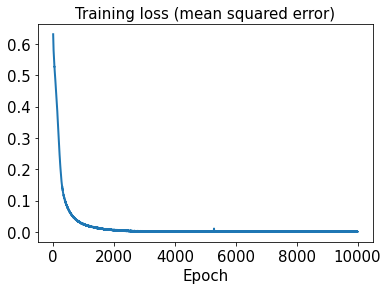

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

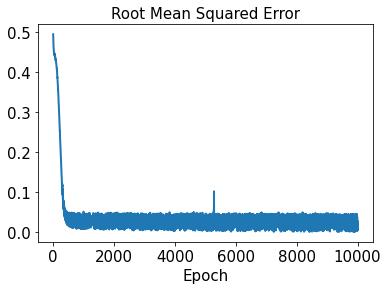

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
test_results1 = sd1.evaluate(t_test)

1/1 [==============================] - 0s 115ms/step - loss: 7.1778e-06 - rmse: 0.0000e+00


In [25]:
decoded_train1 = sd1.predict(t_train)

In [26]:
decoded_test1 = sd1.predict(t_test)

In [27]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [28]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [29]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.035745681841554765


In [30]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.03499382544074197


In [31]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.0163072522728821, 0.04203132228685099, 0.020334402921046, 0.0363996925706617, 0.030781642912334706, 0.0384188870375097, 0.03295530494266361, 0.011619924830599537, 0.031941639065396654, 0.008571710231880641, 0.010133352165183455, 0.043617915041179046, 0.019060533354082435, 0.04349369566233711, 0.037757277365376485, 0.04521649879506766, 0.014650373630576849, 0.02580979602041135, 0.04597839679072237, 0.012309203774463625, 0.004605245068853589, 0.04581295031748239, 0.006573935364465156, 0.023993086100896215, 0.011183951917916386, 0.03841927108372194, 0.024666334987951087, 0.029733835960607437, 0.027813026562911073, 0.041156612804382244, 0.03391276688573522, 0.01729038377288069, 0.0043660207215865275]


In [32]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.022527705768209443, 0.035385815442235985, 0.03959340421511847, 0.020933859582081053, 0.044968881282874976, 0.013978964715168567, 0.029099798784120248, 0.004929533255883428]


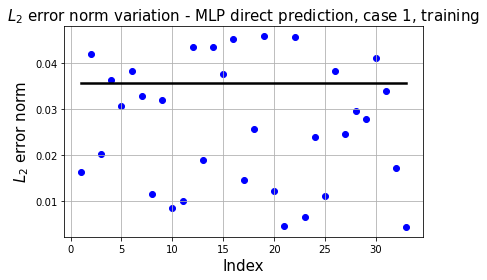

In [33]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

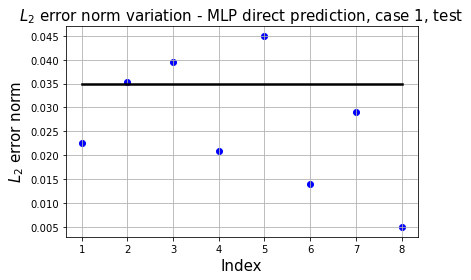

In [34]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

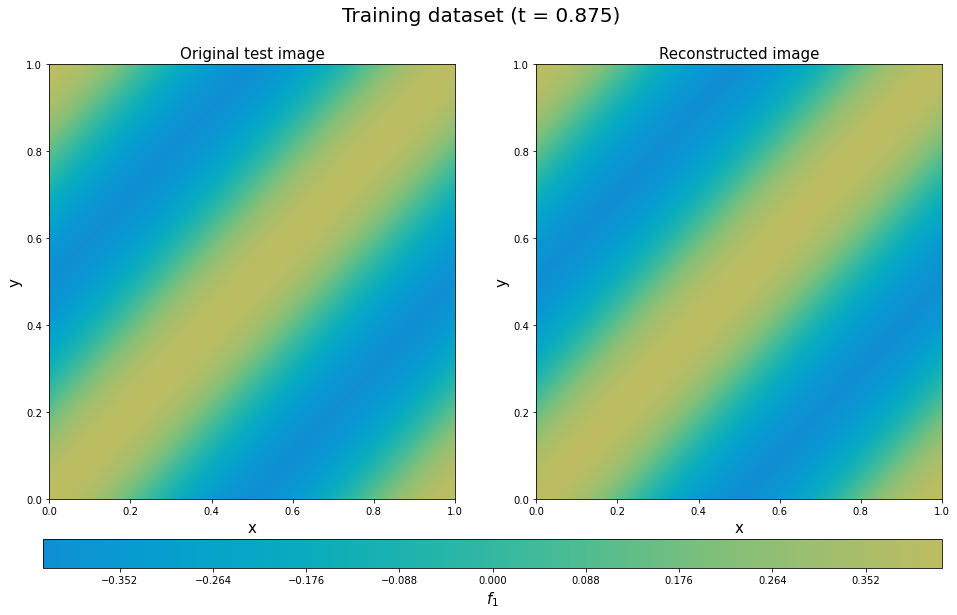

In [35]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

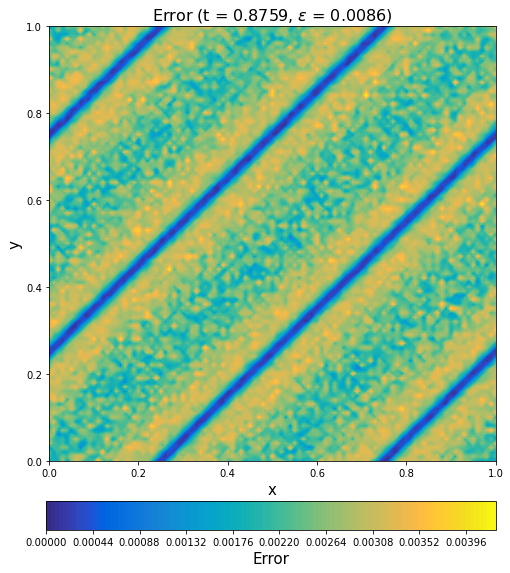

In [36]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.8759, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

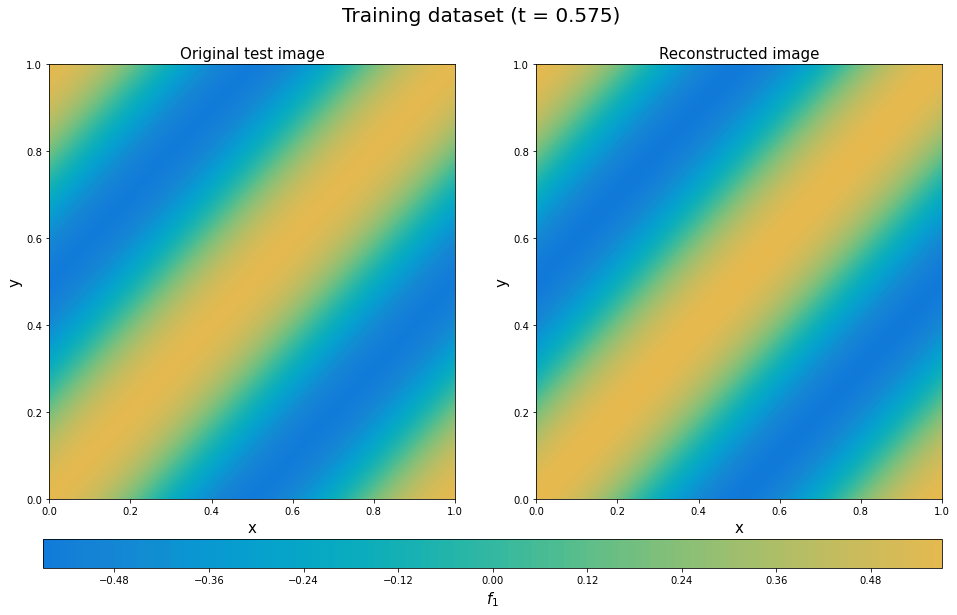

In [37]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

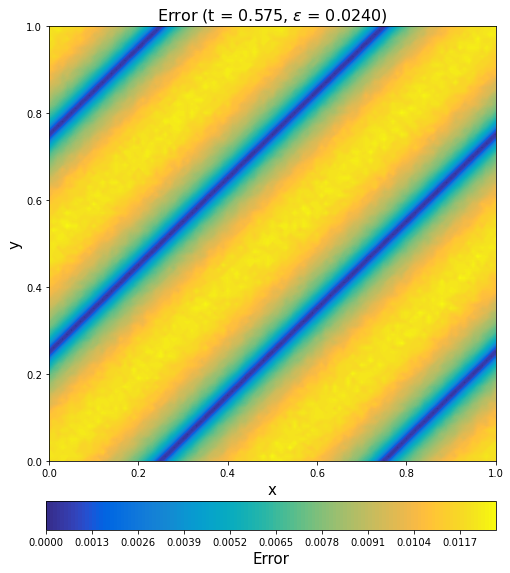

In [38]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

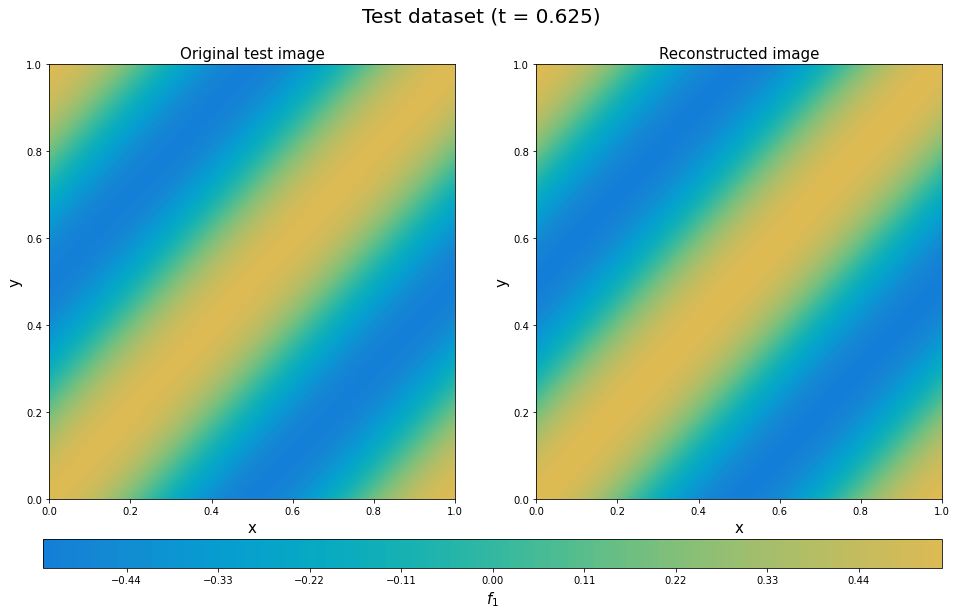

In [39]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

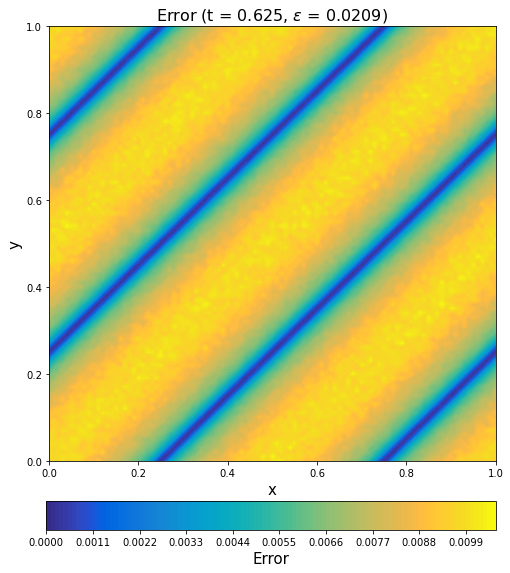

In [40]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

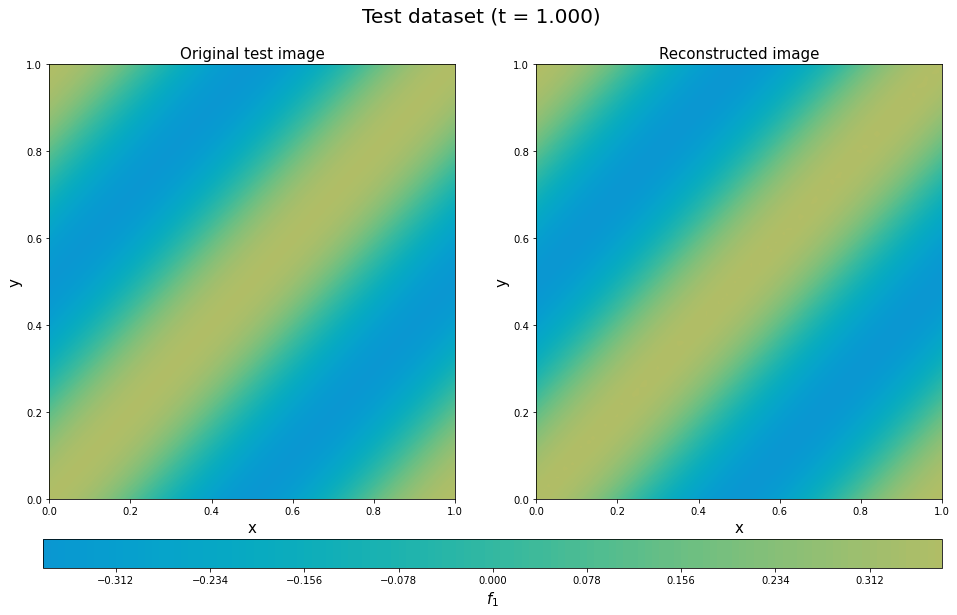

In [41]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

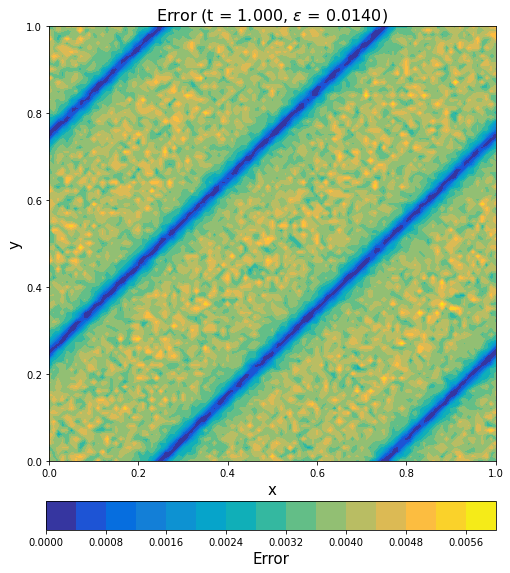

In [42]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [43]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [44]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [45]:
sensor2 = sensor2.reshape((41, 16, 1))

In [46]:
sensor2.shape

(41, 16, 1)

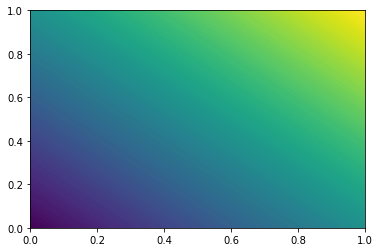

In [47]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [48]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [49]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [50]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [51]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [52]:
start2 = datetime.datetime.now()
history2 = sd2.fit(t_train, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 21ms/step - loss: 2.7031 - rmse: 1.6441
Epoch 2/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.6908 - rmse: 1.6403
Epoch 3/10000
2/2 [==============================] - 0s 21ms/step - loss: 2.6793 - rmse: 1.6368
Epoch 4/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.6684 - rmse: 1.6335
Epoch 5/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.6580 - rmse: 1.6303
Epoch 6/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.6481 - rmse: 1.6273
Epoch 7/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.6385 - rmse: 1.6243
Epoch 8/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.6293 - rmse: 1.6215
Epoch 9/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.6204 - rmse: 1.6188
Epoch 10/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.6119 - rmse: 1.6161
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 10ms/step - loss: 2.0298 - rmse: 1.4246
Epoch 86/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0270 - rmse: 1.4237
Epoch 87/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0172 - rmse: 1.4202
Epoch 88/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0092 - rmse: 1.4174
Epoch 89/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0025 - rmse: 1.4150
Epoch 90/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9983 - rmse: 1.4135
Epoch 91/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9918 - rmse: 1.4112
Epoch 92/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9817 - rmse: 1.4076
Epoch 93/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9777 - rmse: 1.4062
Epoch 94/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9682 - rmse: 1.4028
Epoch 95/10000
2/2 [=============================

2/2 [==============================] - 0s 11ms/step - loss: 1.4453 - rmse: 1.2021
Epoch 170/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4407 - rmse: 1.2002
Epoch 171/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4372 - rmse: 1.1988
Epoch 172/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4244 - rmse: 1.1934
Epoch 173/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4182 - rmse: 1.1908
Epoch 174/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4138 - rmse: 1.1890
Epoch 175/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4086 - rmse: 1.1868
Epoch 176/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4026 - rmse: 1.1842
Epoch 177/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.3897 - rmse: 1.1788
Epoch 178/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3888 - rmse: 1.1784
Epoch 179/10000
2/2 [===================

2/2 [==============================] - 0s 11ms/step - loss: 0.8715 - rmse: 0.9335
Epoch 254/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8667 - rmse: 0.9309
Epoch 255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8577 - rmse: 0.9260
Epoch 256/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8522 - rmse: 0.9231
Epoch 257/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8468 - rmse: 0.9201
Epoch 258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8415 - rmse: 0.9172
Epoch 259/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.8327 - rmse: 0.9125
Epoch 260/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8273 - rmse: 0.9095
Epoch 261/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8196 - rmse: 0.9052
Epoch 262/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.8149 - rmse: 0.9027
Epoch 263/10000
2/2 [===================

2/2 [==============================] - 0s 11ms/step - loss: 0.4402 - rmse: 0.6634
Epoch 338/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4385 - rmse: 0.6621
Epoch 339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4335 - rmse: 0.6584
Epoch 340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4281 - rmse: 0.6543
Epoch 341/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4304 - rmse: 0.6560
Epoch 342/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4202 - rmse: 0.6482
Epoch 343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4183 - rmse: 0.6467
Epoch 344/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4142 - rmse: 0.6435
Epoch 345/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4100 - rmse: 0.6403
Epoch 346/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4090 - rmse: 0.6394
Epoch 347/10000
2/2 [====================

2/2 [==============================] - 0s 10ms/step - loss: 0.1966 - rmse: 0.4433
Epoch 422/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1932 - rmse: 0.4395
Epoch 423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1944 - rmse: 0.4408
Epoch 424/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1910 - rmse: 0.4370
Epoch 425/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1893 - rmse: 0.4350
Epoch 426/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1917 - rmse: 0.4377
Epoch 427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1864 - rmse: 0.4316
Epoch 428/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1886 - rmse: 0.4342
Epoch 429/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1812 - rmse: 0.4256
Epoch 430/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1817 - rmse: 0.4262
Epoch 431/10000
2/2 [===================

2/2 [==============================] - 0s 11ms/step - loss: 0.0785 - rmse: 0.2800
Epoch 506/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0763 - rmse: 0.2761
Epoch 507/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0776 - rmse: 0.2785
Epoch 508/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0745 - rmse: 0.2728
Epoch 509/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0722 - rmse: 0.2686
Epoch 510/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0754 - rmse: 0.2744
Epoch 511/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0719 - rmse: 0.2680
Epoch 512/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0733 - rmse: 0.2706
Epoch 513/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0730 - rmse: 0.2700
Epoch 514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0726 - rmse: 0.2694
Epoch 515/10000
2/2 [==================

2/2 [==============================] - 0s 10ms/step - loss: 0.0327 - rmse: 0.1806
Epoch 590/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0327 - rmse: 0.1806
Epoch 591/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0340 - rmse: 0.1841
Epoch 592/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0283 - rmse: 0.1682
Epoch 593/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0296 - rmse: 0.1718
Epoch 594/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0278 - rmse: 0.1667
Epoch 595/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0288 - rmse: 0.1694
Epoch 596/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0299 - rmse: 0.1726
Epoch 597/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0274 - rmse: 0.1654
Epoch 598/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0260 - rmse: 0.1610
Epoch 599/10000
2/2 [====================

2/2 [==============================] - 0s 8ms/step - loss: 0.0110 - rmse: 0.1045
Epoch 674/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0140 - rmse: 0.1181
Epoch 675/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0094 - rmse: 0.0967
Epoch 676/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0106 - rmse: 0.1027
Epoch 677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0158 - rmse: 0.1254
Epoch 678/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0089 - rmse: 0.0942
Epoch 679/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0154 - rmse: 0.1240
Epoch 680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0105 - rmse: 0.1020
Epoch 682/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0123 - rmse: 0.1105
Epoch 683/10000
2/2 [=======================

2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0847
Epoch 758/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 759/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0085 - rmse: 0.0916
Epoch 760/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0845
Epoch 761/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0549
Epoch 762/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0051 - rmse: 0.0710
Epoch 763/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 764/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 765/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 766/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0094 - rmse: 0.0966
Epoch 767/10000
2/2 [=====================

2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 842/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0310
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0917
Epoch 844/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 846/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 847/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 848/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 849/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 850/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 851/10000
2/2 [=====================

2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0825
Epoch 925/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4682e-04 - rmse: 0.0299
Epoch 926/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 927/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.3832e-04 - rmse: 0.0280
Epoch 928/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 929/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0806
Epoch 930/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0709
Epoch 931/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 932/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 933/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0501
Epoch 934/10000
2/2 [=============

2/2 [==============================] - 0s 10ms/step - loss: 2.5228e-04 - rmse: 0.0142
Epoch 1008/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 1009/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 1010/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0568
Epoch 1011/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0837
Epoch 1012/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 1013/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.2425e-04 - rmse: 0.0218
Epoch 1014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 1015/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 1016/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 1017/10000
2/2 [====

2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 1090/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 1091/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7956e-04 - rmse: 0.0182
Epoch 1092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 1093/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 1094/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 1095/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 1096/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0729
Epoch 1097/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0127e-04 - rmse: 0.0124
Epoch 1098/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3988e-04 - rmse: 0.0096
Epoch 1099/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 1172/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 1173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 1174/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 1175/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 1176/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 1177/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.4721e-04 - rmse: 0.0301
Epoch 1178/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 1179/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 1180/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 1181/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 1254/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 1255/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 1256/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 1257/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.3992e-04 - rmse: 0.0141
Epoch 1258/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 1259/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 1260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0679
Epoch 1261/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6845e-04 - rmse: 0.0151
Epoch 1262/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 1263/10000
2/2 [==

2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 1336/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.6785e-04 - rmse: 0.0270
Epoch 1337/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 1338/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 1339/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9622e-04 - rmse: 0.0214
Epoch 1340/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.4635e-04 - rmse: 0.0225
Epoch 1341/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0664
Epoch 1342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 1343/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 1344/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0793
Epoch 1345/10000
2/

2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 1418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 1419/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 1420/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.2759e-04 - rmse: 0.0138
Epoch 1421/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3052e-04 - rmse: 0.0096
Epoch 1422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 1423/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9185e-04 - rmse: 0.0124
Epoch 1424/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 1425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 1426/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1962e-04 - rmse: 0.0135
Epoch 1427/10000


2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 1500/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 1501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 1502/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.6933e-05 - rmse: 0.0078
Epoch 1503/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0737
Epoch 1504/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 1505/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 1506/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 1507/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4896e-04 - rmse: 0.0146
Epoch 1508/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 1509/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 1582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 1583/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 1584/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 1585/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 1586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 1587/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.4840e-04 - rmse: 0.0248
Epoch 1588/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0057 - rmse: 0.0750
Epoch 1589/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0667
Epoch 1590/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 1591/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.0889
Epoch 1665/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 1666/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 1667/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0880
Epoch 1668/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 1669/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.1375e-04 - rmse: 0.0297
Epoch 1670/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 1671/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 1672/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 1673/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7366e-04 - rmse: 0.0185
Epoch 1674/10000
2/2 [==

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 1747/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 1748/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 1749/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 1750/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.1551e-04 - rmse: 0.0196
Epoch 1751/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.7373e-04 - rmse: 0.0155
Epoch 1752/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.5113e-04 - rmse: 0.0268
Epoch 1753/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 1754/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.4650e-04 - rmse: 0.0204
Epoch 1755/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8290e-04 - rmse: 0.0255
Epoch 1756/10

2/2 [==============================] - 0s 8ms/step - loss: 9.5305e-04 - rmse: 0.0304
Epoch 1829/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 1830/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0709
Epoch 1831/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 1832/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 1833/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0588
Epoch 1834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 1835/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 1836/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 1837/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0925
Epoch 1838/10000
2/2 [=======

2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0727
Epoch 1911/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 1912/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 1913/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0635
Epoch 1914/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 1915/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 1916/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.3072e-04 - rmse: 0.0283
Epoch 1917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 1918/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6591e-04 - rmse: 0.0209
Epoch 1919/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0680
Epoch 1920/10000
2/2 [==

2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0703
Epoch 1993/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.7231e-04 - rmse: 0.0290
Epoch 1994/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 1995/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 1996/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 1997/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0862
Epoch 1998/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 1999/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 2000/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 2001/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 2002/10000
2/2 [=======

2/2 [==============================] - 0s 15ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 2075/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 2076/10000
2/2 [==============================] - 0s 15ms/step - loss: 8.7005e-05 - rmse: 0.0077
Epoch 2077/10000
2/2 [==============================] - 0s 21ms/step - loss: 0.0067 - rmse: 0.0814
Epoch 2078/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 2079/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 2080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 2081/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 2082/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 2083/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0723
Epoch 2084/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 2157/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 2158/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 2159/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 2160/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 2161/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 2162/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 2163/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 2164/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 2165/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 2166/10000
2/2 [============

2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 2239/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 2240/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 2241/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 2242/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 2243/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 2244/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 2245/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.0889
Epoch 2246/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 2247/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 2248/10000
2/2 [==========

2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 2321/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 2322/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7534e-04 - rmse: 0.0158
Epoch 2323/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 2324/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 2325/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0834
Epoch 2326/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7413e-04 - rmse: 0.0274
Epoch 2327/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4131e-04 - rmse: 0.0303
Epoch 2328/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 2329/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 2330/10000
2/2

2/2 [==============================] - 0s 9ms/step - loss: 3.6291e-04 - rmse: 0.0184
Epoch 2404/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 2405/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9429e-04 - rmse: 0.0130
Epoch 2406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 2407/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 2408/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 2409/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 2410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 2411/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 2412/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.5919e-04 - rmse: 0.0289
Epoch 2413/10000
2/2 [

2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0819
Epoch 2486/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 2487/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0801
Epoch 2488/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 2489/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 2490/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7657e-04 - rmse: 0.0188
Epoch 2491/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 2492/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4145e-04 - rmse: 0.0178
Epoch 2493/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 2494/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.9674e-04 - rmse: 0.0193
Epoch 2495/10000
2/

2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 2568/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8433e-04 - rmse: 0.0214
Epoch 2569/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 2570/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.7401e-04 - rmse: 0.0158
Epoch 2571/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.2768e-05 - rmse: 0.0043
Epoch 2572/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 2573/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 2574/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 2575/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 2576/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 2577/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 2.9713e-04 - rmse: 0.0165
Epoch 2650/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 2651/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 2652/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 2653/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 2654/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 2655/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 2656/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0814
Epoch 2657/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 2658/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 2659/10000
2/2 [=======

2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 2732/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0731
Epoch 2733/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 2734/10000
2/2 [==============================] - 0s 17ms/step - loss: 8.8753e-04 - rmse: 0.0294
Epoch 2735/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0059 - rmse: 0.0764
Epoch 2736/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 2737/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 2738/10000
2/2 [==============================] - 0s 16ms/step - loss: 7.3467e-04 - rmse: 0.0267
Epoch 2739/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 2740/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0082 - rmse: 0.0906
Epoch 2741/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 2815/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 2816/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.5703e-04 - rmse: 0.0252
Epoch 2817/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 2818/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 2819/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 2820/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.9473e-04 - rmse: 0.0239
Epoch 2821/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 2822/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 2823/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0439
Epoch 2824/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 2897/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0731
Epoch 2898/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.5542e-04 - rmse: 0.0305
Epoch 2899/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 2900/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 2901/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 2902/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 2903/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.4403e-04 - rmse: 0.0287
Epoch 2904/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 2905/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0834
Epoch 2906/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 2979/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 2980/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.4095e-04 - rmse: 0.0205
Epoch 2981/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 2982/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 2983/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 2984/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 2985/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8769e-04 - rmse: 0.0191
Epoch 2986/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 2987/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 2988/10000
2/2 [====

2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 3061/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.6744e-04 - rmse: 0.0254
Epoch 3062/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 3063/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.8751e-04 - rmse: 0.0191
Epoch 3064/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 3065/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 3066/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2312e-04 - rmse: 0.0174
Epoch 3067/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 3068/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 3069/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3004e-04 - rmse: 0.0202
Epoch 3070/10000


2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 3143/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 3144/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 3145/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 3146/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0727
Epoch 3147/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 3148/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.7235e-04 - rmse: 0.0255
Epoch 3149/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 3150/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 3151/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3404e-04 - rmse: 0.0106
Epoch 3152/10000
2/2 [==

2/2 [==============================] - 0s 9ms/step - loss: 2.2352e-04 - rmse: 0.0142
Epoch 3225/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8090e-04 - rmse: 0.0161
Epoch 3226/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4649e-04 - rmse: 0.0206
Epoch 3227/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0879
Epoch 3228/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 3229/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0755
Epoch 3230/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 3231/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 3232/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 3233/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 3234/10000
2/2

2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 3307/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0878
Epoch 3308/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 3309/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 3310/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 3311/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 3312/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5222e-04 - rmse: 0.0288
Epoch 3313/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.4236e-04 - rmse: 0.0249
Epoch 3314/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.1113e-04 - rmse: 0.0170
Epoch 3315/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0362e-04 - rmse: 0.0135
Epoch 3316/10000
2

2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 3389/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.9736e-04 - rmse: 0.0313
Epoch 3390/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.2459e-04 - rmse: 0.0246
Epoch 3391/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 3392/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 3393/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 3394/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 3395/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 3396/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 3397/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6384e-04 - rmse: 0.0156
Epoch 3398/10000
2/2

2/2 [==============================] - 0s 10ms/step - loss: 7.5844e-05 - rmse: 0.0074
Epoch 3471/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 3472/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.8604e-04 - rmse: 0.0163
Epoch 3473/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 3474/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4394e-04 - rmse: 0.0180
Epoch 3475/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 3476/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 3477/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 3478/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 3479/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 3480/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 3553/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 3554/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 3555/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0090 - rmse: 0.0947
Epoch 3556/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0083 - rmse: 0.0912
Epoch 3557/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0777
Epoch 3558/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 3559/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 3560/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 3561/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 3562/10000
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 3636/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0541e-04 - rmse: 0.0196
Epoch 3637/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 3638/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 3639/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 3640/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6838e-04 - rmse: 0.0187
Epoch 3641/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 3642/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 3643/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 3644/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 3645/10000
2/2 [==

2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0873
Epoch 3718/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.1329e-04 - rmse: 0.0139
Epoch 3719/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 3720/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 3721/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.1588e-04 - rmse: 0.0172
Epoch 3722/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 3723/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 3724/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 3725/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 3726/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2049e-04 - rmse: 0.0200
Epoch 3727/10000
2/2

2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 3800/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.6013e-04 - rmse: 0.0232
Epoch 3801/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 3802/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 3803/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 3804/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 3805/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5956e-04 - rmse: 0.0232
Epoch 3806/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 3807/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 3808/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 3809/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 3882/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 3883/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 3884/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 3885/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 3886/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 3887/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0764
Epoch 3888/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 3889/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.8107e-04 - rmse: 0.0237
Epoch 3890/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 3891/10000
2/2 [======

2/2 [==============================] - 0s 10ms/step - loss: 1.4434e-04 - rmse: 0.0112
Epoch 3964/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 3965/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 3966/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 3967/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.7292e-04 - rmse: 0.0159
Epoch 3968/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.2724e-04 - rmse: 0.0284
Epoch 3969/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 3970/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 3971/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 3972/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 3973/10000
2/2

2/2 [==============================] - 0s 11ms/step - loss: 1.6757e-04 - rmse: 0.0122
Epoch 4046/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0724
Epoch 4047/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5867e-04 - rmse: 0.0118
Epoch 4048/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 4049/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 4050/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 4051/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 4052/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0874
Epoch 4053/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 4054/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0777
Epoch 4055/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 4128/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 4129/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3141e-04 - rmse: 0.0177
Epoch 4130/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 4131/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6137e-04 - rmse: 0.0210
Epoch 4132/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 4133/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 4134/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 4135/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9894e-04 - rmse: 0.0134
Epoch 4136/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 4137/10000
2/2 

2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0883
Epoch 4210/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 4211/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3714e-04 - rmse: 0.0249
Epoch 4212/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 4213/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 4214/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 4215/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 4216/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 4217/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 4218/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 4219/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 4292/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 4293/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 4294/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 4295/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0075 - rmse: 0.0862
Epoch 4296/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.8488e-04 - rmse: 0.0258
Epoch 4297/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 4298/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.0686e-04 - rmse: 0.0281
Epoch 4299/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 4300/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 4301/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 1.9460e-04 - rmse: 0.0133
Epoch 4374/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 4375/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2971e-04 - rmse: 0.0176
Epoch 4376/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2600e-04 - rmse: 0.0104
Epoch 4377/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 4378/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 4379/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 4380/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3818e-04 - rmse: 0.0109
Epoch 4381/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 4382/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8390e-04 - rmse: 0.0191
Epoch 4383/1

2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 4456/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 4457/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7060e-04 - rmse: 0.0123
Epoch 4458/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.8900e-04 - rmse: 0.0312
Epoch 4459/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 4460/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 4461/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 4462/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 4463/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3138e-04 - rmse: 0.0146
Epoch 4464/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 4465/10000
2/2 [

2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 4538/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.5659e-04 - rmse: 0.0290
Epoch 4539/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0901
Epoch 4540/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 4541/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 4542/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 4543/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 4544/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 4545/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 4546/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 4547/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 4620/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 4621/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 4622/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.7855e-04 - rmse: 0.0127
Epoch 4623/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 4624/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 4625/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 4626/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 4627/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 4628/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 4629/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 4.2122e-04 - rmse: 0.0201
Epoch 4702/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 4703/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 4704/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 4705/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 4706/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 4707/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0838
Epoch 4708/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.9391e-04 - rmse: 0.0260
Epoch 4709/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 4710/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0800
Epoch 4711/10000
2/2 [===

2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 4784/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 4785/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.0233e-04 - rmse: 0.0169
Epoch 4786/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0833
Epoch 4787/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 4788/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 4789/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 4790/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.9048e-04 - rmse: 0.0217
Epoch 4791/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 4792/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 4793/10000
2/2 [==

2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 4866/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.0465e-04 - rmse: 0.0221
Epoch 4867/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5231e-05 - rmse: 0.0088
Epoch 4868/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.4013e-05 - rmse: 0.0081
Epoch 4869/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 4870/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.8278e-04 - rmse: 0.0294
Epoch 4871/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 4872/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 4873/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 4874/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3504e-04 - rmse: 0.0108
Epoch 4875/100

2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 4948/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 4949/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.6379e-04 - rmse: 0.0254
Epoch 4950/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 4951/10000
2/2 [==============================] - 0s 17ms/step - loss: 8.0548e-04 - rmse: 0.0281
Epoch 4952/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 4953/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 4954/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 4955/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 4956/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3755e-04 - rmse: 0.0303
Epoch 4957/10000


2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 5030/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6386e-04 - rmse: 0.0211
Epoch 5031/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 5032/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 5033/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 5034/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 5035/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.7575e-05 - rmse: 0.0089
Epoch 5036/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 5037/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5276e-05 - rmse: 0.0082
Epoch 5038/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 5039/10000
2/2 [

2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0428
Epoch 5112/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0724
Epoch 5113/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.6107e-04 - rmse: 0.0290
Epoch 5114/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 5115/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 5116/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.8638e-04 - rmse: 0.0130
Epoch 5117/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3465e-04 - rmse: 0.0178
Epoch 5118/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 5119/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2417e-04 - rmse: 0.0202
Epoch 5120/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 5121/1000

2/2 [==============================] - 0s 9ms/step - loss: 1.8523e-04 - rmse: 0.0130
Epoch 5194/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 5195/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.1493e-05 - rmse: 0.0080
Epoch 5196/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 5197/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 5198/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 5199/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 5200/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 5201/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 5202/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 5203/10000
2/2 [===

2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 5276/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.4786e-04 - rmse: 0.0305
Epoch 5277/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 5278/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0803
Epoch 5279/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 5280/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 5281/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.4118e-04 - rmse: 0.0250
Epoch 5282/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.7355e-04 - rmse: 0.0214
Epoch 5283/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 5284/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 5285/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 5.9435e-04 - rmse: 0.0240
Epoch 5358/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 5359/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 5360/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 5361/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.3186e-04 - rmse: 0.0147
Epoch 5362/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 5363/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 5364/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 5365/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 5366/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 5367/10000
2/2 [====

2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 5440/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 5441/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0552
Epoch 5442/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.2201e-04 - rmse: 0.0301
Epoch 5443/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 5444/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 5445/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 5446/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 5447/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 5448/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 5449/10000
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 5522/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.7365e-04 - rmse: 0.0256
Epoch 5523/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 5524/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0751
Epoch 5525/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 5526/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 5527/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 5528/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 5529/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 5530/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 5531/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 4.6301e-04 - rmse: 0.0211
Epoch 5604/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 5605/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 5606/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 5607/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2960e-04 - rmse: 0.0106
Epoch 5608/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1653e-04 - rmse: 0.0100
Epoch 5609/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.2587e-04 - rmse: 0.0266
Epoch 5610/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 5611/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1633e-04 - rmse: 0.0100
Epoch 5612/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8242e-04 - rmse: 0.0129
Epoch 561

2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 5686/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 5687/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 5688/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.7205e-04 - rmse: 0.0213
Epoch 5689/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.3041e-04 - rmse: 0.0285
Epoch 5690/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 5691/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.9086e-04 - rmse: 0.0193
Epoch 5692/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.0012e-04 - rmse: 0.0297
Epoch 5693/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 5694/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 5695/10000


2/2 [==============================] - 0s 8ms/step - loss: 6.4030e-04 - rmse: 0.0250
Epoch 5768/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 5769/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 5770/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2512e-04 - rmse: 0.0104
Epoch 5771/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8237e-04 - rmse: 0.0163
Epoch 5772/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3577e-05 - rmse: 0.0076
Epoch 5773/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7103e-05 - rmse: 0.0071
Epoch 5774/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 5775/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 5776/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.3227e-05 - rmse: 0.0082
Epoch 5777

2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 5850/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 5851/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 5852/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 5853/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 5854/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0874
Epoch 5855/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 5856/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 5857/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0766e-04 - rmse: 0.0171
Epoch 5858/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 5859/10000
2/2 [=======

2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 5932/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.7291e-04 - rmse: 0.0256
Epoch 5933/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 5934/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 5935/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 5936/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 5937/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 5938/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9267e-04 - rmse: 0.0194
Epoch 5939/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 5940/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2540e-04 - rmse: 0.0104
Epoch 5941/10000
2/2

2/2 [==============================] - 0s 17ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 6014/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.0825e-04 - rmse: 0.0139
Epoch 6015/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 6016/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 6017/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.5016e-05 - rmse: 0.0077
Epoch 6018/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.5260e-04 - rmse: 0.0154
Epoch 6019/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 6020/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 6021/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 6022/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2093e-04 - rmse: 0.0102
Epoch 6023/100

2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 6096/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.7408e-05 - rmse: 0.0064
Epoch 6097/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0868
Epoch 6098/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 6099/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 6100/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0737
Epoch 6101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 6102/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 6103/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6200e-04 - rmse: 0.0211
Epoch 6104/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 6105/10000
2/2 [==

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 6178/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 6179/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 6180/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 6181/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.0767e-04 - rmse: 0.0222
Epoch 6182/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 6183/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0804
Epoch 6184/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 6185/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 6186/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 6187/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 6260/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4565e-04 - rmse: 0.0207
Epoch 6261/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 6262/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 6263/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4079e-04 - rmse: 0.0112
Epoch 6264/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 6265/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0777
Epoch 6266/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2678e-04 - rmse: 0.0176
Epoch 6267/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 6268/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 6269/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 6342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 6343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 6344/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 6345/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.6648e-05 - rmse: 0.0078
Epoch 6346/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 6347/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.5398e-05 - rmse: 0.0089
Epoch 6348/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 6349/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5281e-04 - rmse: 0.0154
Epoch 6350/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 6351/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 9.5142e-04 - rmse: 0.0306
Epoch 6424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 6425/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2514e-04 - rmse: 0.0176
Epoch 6426/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 6427/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 6428/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 6429/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 6430/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 6431/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 6432/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 6433/10000
2/2 [===

2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0763
Epoch 6506/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 6507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 6508/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0079 - rmse: 0.0888
Epoch 6509/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 6510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 6511/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 6512/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 6513/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 6514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 6515/10000
2/2 [=======

Epoch 6588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 6589/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 6590/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 6591/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 6592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 6593/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 6594/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 6595/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 6596/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 6597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0902
Epoch 6598/10000

2/2 [==============================] - 0s 10ms/step - loss: 8.5983e-05 - rmse: 0.0084
Epoch 6671/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 6672/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1244e-04 - rmse: 0.0098
Epoch 6673/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 6674/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 6675/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 6676/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 6677/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 6678/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 6679/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 6680/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 6753/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 6754/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 6755/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 6756/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 6757/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 6758/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.5765e-04 - rmse: 0.0272
Epoch 6759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0786
Epoch 6760/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0789
Epoch 6761/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 6762/10000
2/2 [=====

2/2 [==============================] - 0s 9ms/step - loss: 0.0051 - rmse: 0.0710
Epoch 6836/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 6837/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8975e-04 - rmse: 0.0193
Epoch 6838/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0759
Epoch 6839/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6591e-04 - rmse: 0.0212
Epoch 6840/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6894e-04 - rmse: 0.0213
Epoch 6841/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.0889
Epoch 6842/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.9454e-04 - rmse: 0.0241
Epoch 6843/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 6844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 6845/10000


2/2 [==============================] - 0s 9ms/step - loss: 9.9563e-04 - rmse: 0.0313
Epoch 6918/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 6919/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 6920/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 6921/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 6922/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 6923/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 6924/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 6925/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 6926/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 6927/10000
2/2 [=======

2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 7000/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 7001/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 7002/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 7003/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 7004/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.4238e-04 - rmse: 0.0288
Epoch 7005/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 7006/10000
2/2 [==============================] - 0s 15ms/step - loss: 6.5743e-05 - rmse: 0.0071
Epoch 7007/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 7008/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 7009/10000
2/2

2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 7082/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 7083/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 7084/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 7085/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 7086/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 7087/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 7088/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 7089/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 7090/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 7091/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 7164/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 7165/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0853
Epoch 7166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 7167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 7168/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 7169/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.8768e-04 - rmse: 0.0312
Epoch 7170/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 7171/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0625
Epoch 7172/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 7173/10000
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 9.8553e-05 - rmse: 0.0091
Epoch 7246/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 7247/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 7248/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0062e-05 - rmse: 0.0074
Epoch 7249/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 7250/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.0134e-04 - rmse: 0.0220
Epoch 7251/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 7252/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5700e-05 - rmse: 0.0064
Epoch 7253/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 7254/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 7255/10000

2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 7328/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 7329/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3460e-04 - rmse: 0.0148
Epoch 7330/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 7331/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 7332/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 7333/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 7334/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 7335/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 7336/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6662e-05 - rmse: 0.0064
Epoch 7337/10000
2/2 [==

2/2 [==============================] - 0s 10ms/step - loss: 1.2683e-04 - rmse: 0.0106
Epoch 7410/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 7411/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 7412/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1260e-04 - rmse: 0.0282
Epoch 7413/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 7414/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 7415/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 7416/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0681
Epoch 7417/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0737
Epoch 7418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0560
Epoch 7419/10000
2/2 [====

2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 7492/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 7493/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 7494/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0111e-04 - rmse: 0.0136
Epoch 7495/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0757e-04 - rmse: 0.0139
Epoch 7496/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 7497/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6729e-04 - rmse: 0.0188
Epoch 7498/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 7499/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 7500/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3521e-04 - rmse: 0.0228
Epoch 7501/100

2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 7574/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.1904e-04 - rmse: 0.0284
Epoch 7575/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 7576/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5269e-04 - rmse: 0.0209
Epoch 7577/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 7578/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.7186e-05 - rmse: 0.0072
Epoch 7579/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 7580/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.3625e-04 - rmse: 0.0287
Epoch 7581/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 7582/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 7583/10000

2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 7656/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 7657/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3240e-04 - rmse: 0.0147
Epoch 7658/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 7659/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 7660/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 7661/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7890e-04 - rmse: 0.0128
Epoch 7662/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 7663/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 7664/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 7665/10000
2/2 [==

2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 7738/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 7739/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 7740/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 7741/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 7742/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 7743/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 7744/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0977e-04 - rmse: 0.0097
Epoch 7745/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8633e-04 - rmse: 0.0165
Epoch 7746/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2248e-04 - rmse: 0.0104
Epoch 7747/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 1.6995e-04 - rmse: 0.0125
Epoch 7820/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 7821/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 7822/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 7823/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.4490e-04 - rmse: 0.0288
Epoch 7824/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7825/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 7826/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 7827/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 7828/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 7829/10000
2/2 [====

2/2 [==============================] - 0s 15ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 7902/10000
2/2 [==============================] - 0s 21ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 7903/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 7904/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 7905/10000
2/2 [==============================] - 0s 17ms/step - loss: 4.3405e-04 - rmse: 0.0205
Epoch 7906/10000
2/2 [==============================] - 0s 16ms/step - loss: 3.5123e-04 - rmse: 0.0183
Epoch 7907/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 7908/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.9204e-04 - rmse: 0.0296
Epoch 7909/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.9021e-04 - rmse: 0.0218
Epoch 7910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 7911/10

2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 7984/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 7985/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 7986/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.7097e-04 - rmse: 0.0275
Epoch 7987/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 7988/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7717e-04 - rmse: 0.0190
Epoch 7989/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5515e-04 - rmse: 0.0119
Epoch 7990/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 7991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 7992/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4262e-04 - rmse: 0.0151
Epoch 7993/10000
2

2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 8066/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 8067/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 8068/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 8069/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 8070/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 8071/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 8072/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 8073/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.2106e-04 - rmse: 0.0225
Epoch 8074/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0643
Epoch 8075/10000
2/2 [====

2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 8148/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 8149/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 8150/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 8151/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 8152/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 8153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 8154/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6777e-04 - rmse: 0.0124
Epoch 8155/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 8156/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 8157/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 8230/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.4669e-04 - rmse: 0.0305
Epoch 8231/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 8232/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 8233/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.3900e-04 - rmse: 0.0250
Epoch 8234/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 8235/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 8236/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 8237/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.1684e-04 - rmse: 0.0224
Epoch 8238/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 8239/10000
2/2 [

2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 8312/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0734
Epoch 8313/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 8314/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.1899e-04 - rmse: 0.0143
Epoch 8315/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2171e-04 - rmse: 0.0104
Epoch 8316/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8992e-04 - rmse: 0.0166
Epoch 8317/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 8318/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 8319/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 8320/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 8321/10000
2/2

2/2 [==============================] - 0s 15ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 8394/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 8395/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 8396/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 8397/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 8398/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 8399/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.8940e-04 - rmse: 0.0296
Epoch 8400/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.6695e-04 - rmse: 0.0274
Epoch 8401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 8402/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.2602e-04 - rmse: 0.0247
Epoch 8403/10000


2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 8476/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 8477/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 8478/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 8479/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3455e-04 - rmse: 0.0228
Epoch 8480/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 8481/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0353
Epoch 8482/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 8483/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5802e-04 - rmse: 0.0156
Epoch 8484/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0737
Epoch 8485/10000
2/2 [===

2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 8558/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 8559/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8641e-04 - rmse: 0.0131
Epoch 8560/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2338e-04 - rmse: 0.0176
Epoch 8561/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 8562/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 8563/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 8564/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 8565/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 8566/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 8567/10000
2/2 [====

2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 8640/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.2704e-04 - rmse: 0.0226
Epoch 8641/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 8642/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 8643/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6856e-04 - rmse: 0.0188
Epoch 8644/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.9444e-04 - rmse: 0.0167
Epoch 8645/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 8646/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 8647/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6016e-04 - rmse: 0.0234
Epoch 8648/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 8649/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 8722/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 8723/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 8724/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0844
Epoch 8725/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 8726/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 8727/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5616e-04 - rmse: 0.0185
Epoch 8728/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.3358e-04 - rmse: 0.0205
Epoch 8729/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0790
Epoch 8730/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3662e-04 - rmse: 0.0205
Epoch 8731/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 8804/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 8805/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 8806/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.2798e-04 - rmse: 0.0302
Epoch 8807/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 8808/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 8809/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0788
Epoch 8810/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 8811/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0625
Epoch 8812/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 8813/10000
2/2 [=======

2/2 [==============================] - 0s 20ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8886/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 8887/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.0585e-04 - rmse: 0.0138
Epoch 8888/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 8889/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 8890/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 8891/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 8892/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 8893/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 8894/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.5565e-04 - rmse: 0.0210
Epoch 8895/10000
2/2 [=

2/2 [==============================] - 0s 9ms/step - loss: 2.3939e-04 - rmse: 0.0150
Epoch 8968/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.8889e-04 - rmse: 0.0296
Epoch 8969/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 8970/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5561e-05 - rmse: 0.0046
Epoch 8971/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 8972/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.2188e-04 - rmse: 0.0301
Epoch 8973/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 8974/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.4404e-05 - rmse: 0.0063
Epoch 8975/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 8976/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 8977/10

2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 9050/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.3825e-04 - rmse: 0.0304
Epoch 9051/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 9052/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 9053/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 9054/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0851
Epoch 9055/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.1867e-04 - rmse: 0.0225
Epoch 9056/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0843
Epoch 9057/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5852e-04 - rmse: 0.0233
Epoch 9058/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0754
Epoch 9059/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 9132/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 9133/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 9134/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 9135/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 9136/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3614e-04 - rmse: 0.0149
Epoch 9137/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0571e-04 - rmse: 0.0171
Epoch 9138/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3166e-04 - rmse: 0.0178
Epoch 9139/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 9140/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 9141/10000
2/2

2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 9214/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 9215/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 9216/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 9217/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.4217e-04 - rmse: 0.0251
Epoch 9218/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0845
Epoch 9219/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 9220/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 9221/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 9222/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.6205e-04 - rmse: 0.0255
Epoch 9223/10000
2/2 [====

2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 9296/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 9297/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 9298/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 9299/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0833
Epoch 9300/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 9301/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 9302/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 9303/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0790
Epoch 9304/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 9305/10000
2/2 [==========

2/2 [==============================] - 0s 17ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 9378/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 9379/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 9380/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0569
Epoch 9381/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0887
Epoch 9382/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 9383/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 9384/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 9385/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 9386/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 9387/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 9460/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0806
Epoch 9461/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.0514e-04 - rmse: 0.0281
Epoch 9462/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 9463/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 9464/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 9465/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0855
Epoch 9466/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 9467/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0052 - rmse: 0.0721
Epoch 9468/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 9469/10000
2/2 [=====

2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 9542/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 9543/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.3488e-04 - rmse: 0.0268
Epoch 9544/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0880
Epoch 9545/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.1545e-04 - rmse: 0.0200
Epoch 9546/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 9547/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0720e-04 - rmse: 0.0139
Epoch 9548/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6713e-04 - rmse: 0.0124
Epoch 9549/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 9550/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8611e-04 - rmse: 0.0131
Epoch 9551/100

2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 9624/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.9860e-04 - rmse: 0.0196
Epoch 9625/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.7213e-04 - rmse: 0.0293
Epoch 9626/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2327e-04 - rmse: 0.0176
Epoch 9627/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 9628/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 9629/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0810e-04 - rmse: 0.0282
Epoch 9630/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5597e-04 - rmse: 0.0119
Epoch 9631/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9632/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 9633/1

2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 9706/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 9707/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 9708/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8024e-04 - rmse: 0.0191
Epoch 9709/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 9710/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 9711/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 9712/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 9713/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4862e-04 - rmse: 0.0153
Epoch 9714/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 9715/10000
2/2 [==

2/2 [==============================] - 0s 8ms/step - loss: 5.6957e-04 - rmse: 0.0236
Epoch 9788/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 9789/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.7548e-04 - rmse: 0.0257
Epoch 9790/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 9791/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.8737e-04 - rmse: 0.0312
Epoch 9792/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 9793/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 9794/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 9795/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4727e-04 - rmse: 0.0183
Epoch 9796/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 9797/10000
2

2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 9870/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8628e-04 - rmse: 0.0131
Epoch 9871/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 9872/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6520e-04 - rmse: 0.0159
Epoch 9873/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8270e-04 - rmse: 0.0130
Epoch 9874/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3319e-04 - rmse: 0.0179
Epoch 9875/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 9876/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 9877/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 9878/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 9879/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 9952/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 9953/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 9954/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 9955/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.4838e-04 - rmse: 0.0208
Epoch 9956/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 9957/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 9958/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 9959/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4909e-04 - rmse: 0.0153
Epoch 9960/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 9961/10000
2/2 [===

In [53]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:03:34.546028


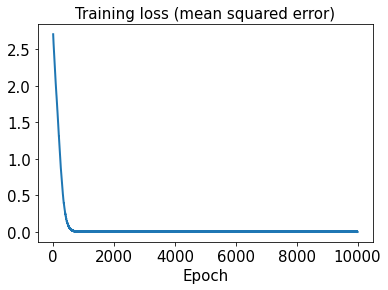

In [54]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

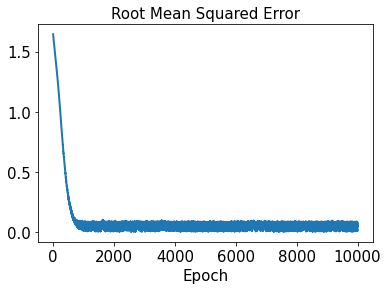

In [55]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [56]:
test_results2 = sd2.evaluate(t_test)

1/1 [==============================] - 0s 95ms/step - loss: 1.3914e-05 - rmse: 0.0000e+00


In [57]:
decoded_train2 = sd2.predict(t_train)

In [58]:
decoded_test2 = sd2.predict(t_test)

In [59]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [60]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [61]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

0.017379924697016075


In [62]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

0.017716561353793694


In [63]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[0.015061020913287902, 0.02252740790124683, 0.01159497088618969, 0.009798662774221138, 0.001071839502354676, 0.015854617566991174, 0.004348984849423677, 0.018361221653031598, 0.0026706432168330163, 0.02131781624166996, 0.020160240139184236, 0.033728691933861625, 0.01279831829288847, 0.02486183772525082, 0.011745860930375423, 0.03391909444900986, 0.016177668052652843, 0.005026600456868545, 0.03228548690737089, 0.017264476008235663, 0.02245542106835811, 0.030246799393506846, 0.021799008627520006, 0.007770087857536282, 0.01942659007362933, 0.013763286977659925, 0.006418657757594453, 0.0006575910193875977, 0.003593306526246961, 0.020342412192734863, 0.006102649713863727, 0.013968159830568401, 0.022945744786454322]


In [64]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[0.00908238504995777, 0.007918521989508953, 0.018039682873371998, 0.01035681190326941, 0.027759838898652866, 0.022568280193667484, 0.0021213248865031287, 0.023434546887997343]


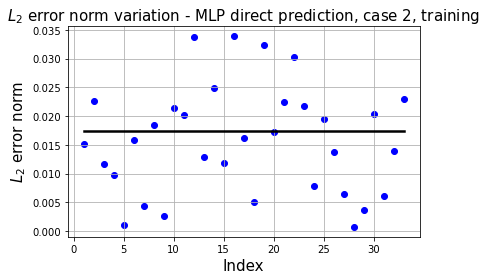

In [65]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

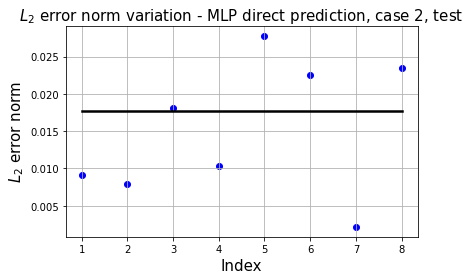

In [66]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

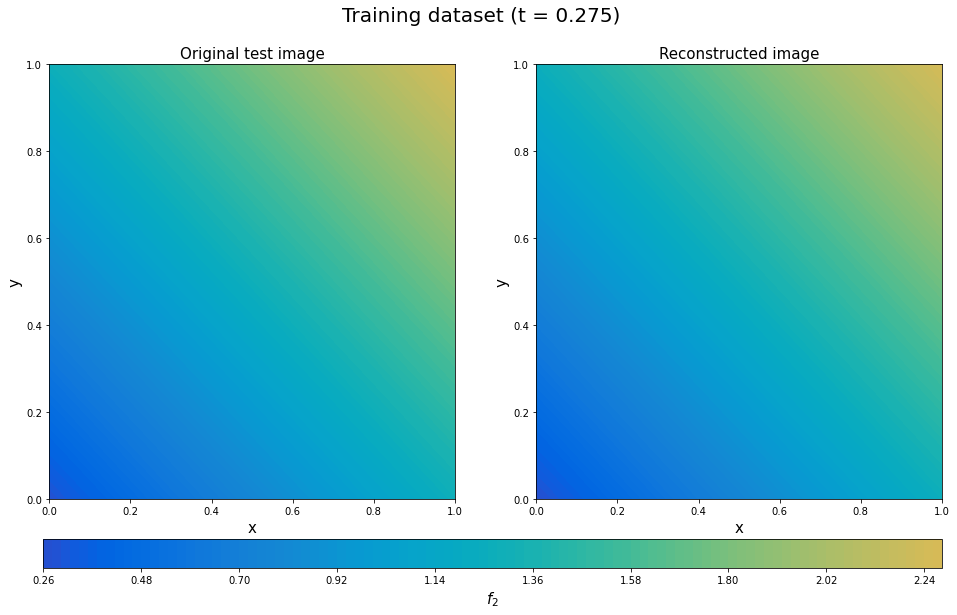

In [67]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

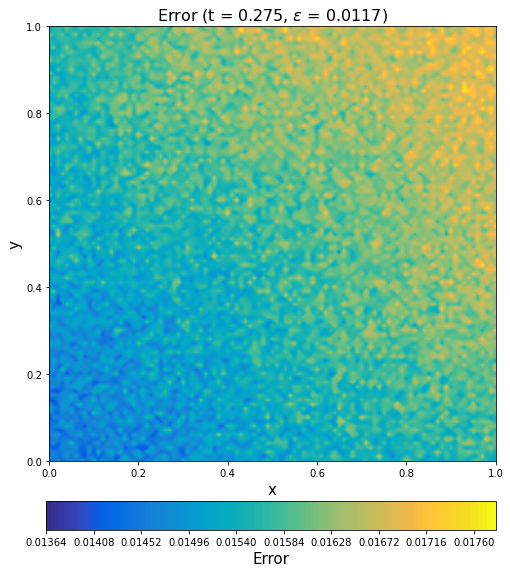

In [68]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

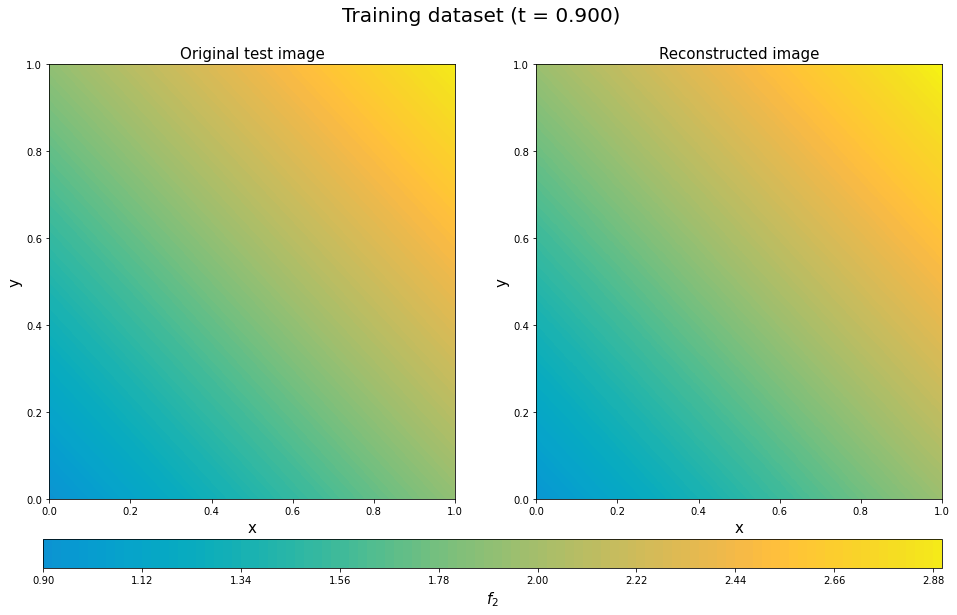

In [69]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

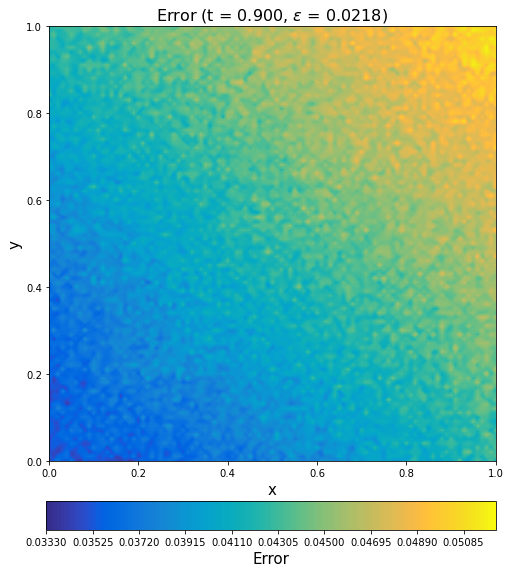

In [70]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

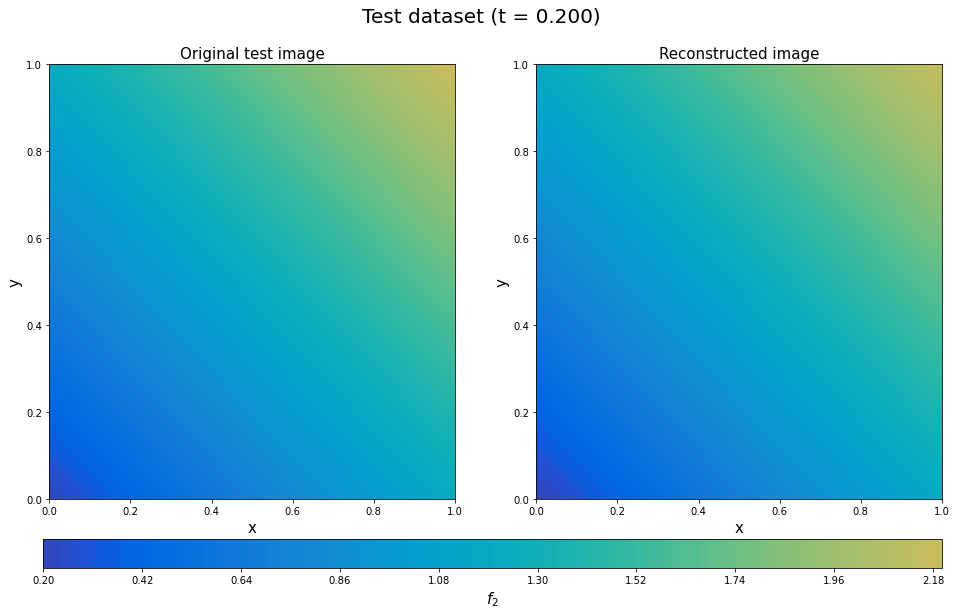

In [71]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

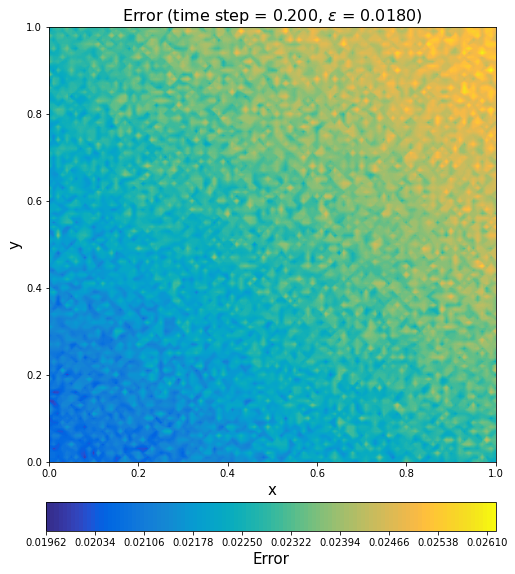

In [72]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

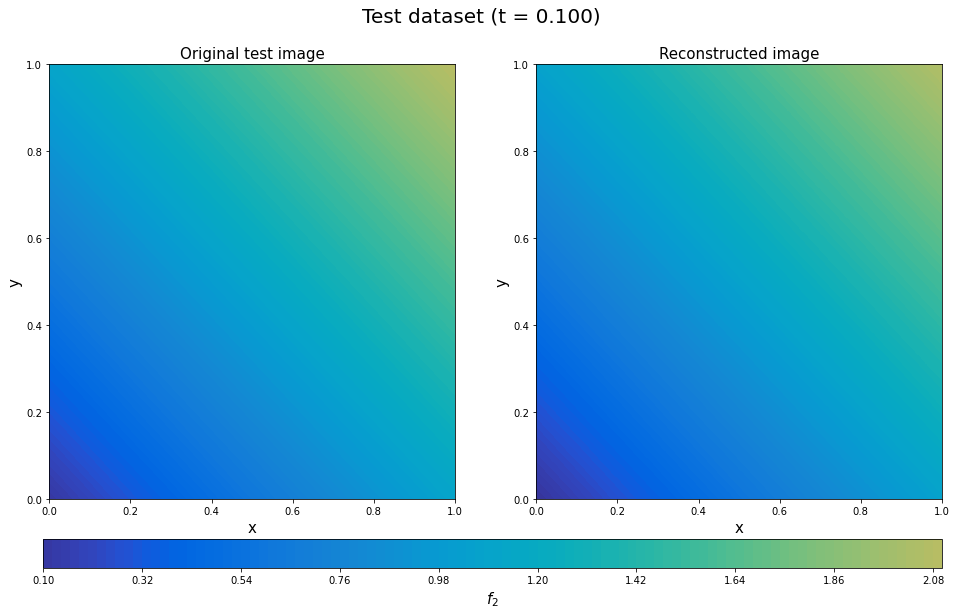

In [73]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

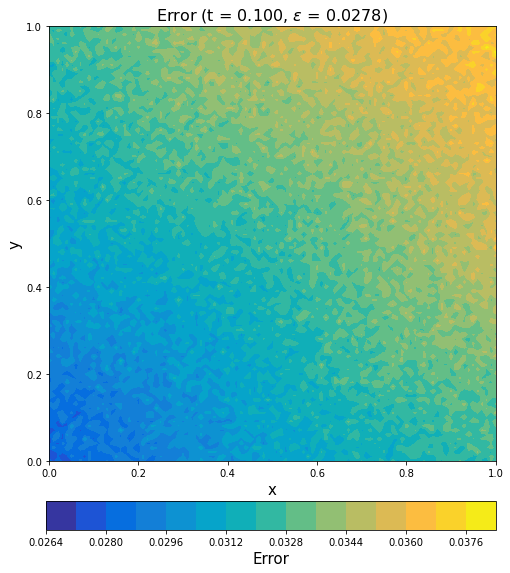

In [74]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [75]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [76]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [77]:
sensor3 = sensor3.reshape((41, 16, 1))

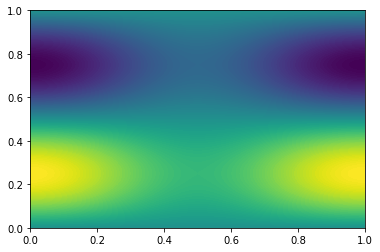

In [78]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [79]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [80]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [81]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [82]:
start3 = datetime.datetime.now()
history3 = sd3.fit(t_train, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 28ms/step - loss: 3.8827 - rmse: 1.9705
Epoch 2/10000
2/2 [==============================] - 0s 34ms/step - loss: 3.8316 - rmse: 1.9574
Epoch 3/10000
2/2 [==============================] - 0s 17ms/step - loss: 3.7933 - rmse: 1.9476
Epoch 4/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7615 - rmse: 1.9395
Epoch 5/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7363 - rmse: 1.9329
Epoch 6/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7126 - rmse: 1.9268
Epoch 7/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6908 - rmse: 1.9211
Epoch 8/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6708 - rmse: 1.9159
Epoch 9/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6505 - rmse: 1.9106
Epoch 10/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6298 - rmse: 1.9052
Epoch 11/10000
2/2 [========================

Epoch 86/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4131 - rmse: 1.5534
Epoch 87/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4032 - rmse: 1.5502
Epoch 88/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3905 - rmse: 1.5461
Epoch 89/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3772 - rmse: 1.5418
Epoch 90/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3659 - rmse: 1.5381
Epoch 91/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3556 - rmse: 1.5348
Epoch 92/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3423 - rmse: 1.5304
Epoch 93/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3304 - rmse: 1.5265
Epoch 94/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3188 - rmse: 1.5227
Epoch 95/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3064 - rmse: 1.5187
Epoch 96/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 1.6393 - rmse: 1.2803
Epoch 171/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6304 - rmse: 1.2768
Epoch 172/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6260 - rmse: 1.2751
Epoch 173/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6158 - rmse: 1.2711
Epoch 174/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6096 - rmse: 1.2686
Epoch 175/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6078 - rmse: 1.2679
Epoch 176/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5982 - rmse: 1.2641
Epoch 177/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5950 - rmse: 1.2629
Epoch 178/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5817 - rmse: 1.2576
Epoch 179/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5776 - rmse: 1.2559
Epoch 180/10000
2/2 [=====================

2/2 [==============================] - 0s 9ms/step - loss: 1.1658 - rmse: 1.0796
Epoch 255/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1540 - rmse: 1.0741
Epoch 256/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1495 - rmse: 1.0720
Epoch 257/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1462 - rmse: 1.0705
Epoch 258/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1401 - rmse: 1.0677
Epoch 259/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1379 - rmse: 1.0666
Epoch 260/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1337 - rmse: 1.0647
Epoch 261/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1268 - rmse: 1.0614
Epoch 262/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1236 - rmse: 1.0599
Epoch 263/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1216 - rmse: 1.0589
Epoch 264/10000
2/2 [====================

2/2 [==============================] - 0s 12ms/step - loss: 0.8424 - rmse: 0.9177
Epoch 339/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.8379 - rmse: 0.9153
Epoch 340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8359 - rmse: 0.9141
Epoch 341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8306 - rmse: 0.9113
Epoch 342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.8275 - rmse: 0.9095
Epoch 343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8244 - rmse: 0.9079
Epoch 344/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8226 - rmse: 0.9068
Epoch 345/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8184 - rmse: 0.9045
Epoch 346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8155 - rmse: 0.9029
Epoch 347/10000
2/2 [==============================] - 0s 23ms/step - loss: 0.8125 - rmse: 0.9012
Epoch 348/10000
2/2 [====================

2/2 [==============================] - 0s 9ms/step - loss: 0.6179 - rmse: 0.7859
Epoch 423/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6159 - rmse: 0.7846
Epoch 424/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6144 - rmse: 0.7837
Epoch 425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6113 - rmse: 0.7817
Epoch 426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6105 - rmse: 0.7812
Epoch 427/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6068 - rmse: 0.7788
Epoch 428/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6048 - rmse: 0.7775
Epoch 429/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6041 - rmse: 0.7771
Epoch 430/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6018 - rmse: 0.7756
Epoch 431/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5982 - rmse: 0.7732
Epoch 432/10000
2/2 [======================

2/2 [==============================] - 0s 8ms/step - loss: 0.4555 - rmse: 0.6748
Epoch 507/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4578 - rmse: 0.6765
Epoch 508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4540 - rmse: 0.6736
Epoch 509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4492 - rmse: 0.6701
Epoch 510/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4473 - rmse: 0.6686
Epoch 511/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4470 - rmse: 0.6684
Epoch 512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4516 - rmse: 0.6719
Epoch 513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4436 - rmse: 0.6658
Epoch 514/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4410 - rmse: 0.6639
Epoch 515/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4407 - rmse: 0.6637
Epoch 516/10000
2/2 [=====================

2/2 [==============================] - 0s 14ms/step - loss: 0.3279 - rmse: 0.5724
Epoch 591/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3235 - rmse: 0.5686
Epoch 592/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.3229 - rmse: 0.5680
Epoch 593/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.3225 - rmse: 0.5677
Epoch 594/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3207 - rmse: 0.5661
Epoch 595/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3191 - rmse: 0.5647
Epoch 596/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3174 - rmse: 0.5632
Epoch 597/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3195 - rmse: 0.5651
Epoch 598/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3149 - rmse: 0.5609
Epoch 599/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3130 - rmse: 0.5593
Epoch 600/10000
2/2 [===================

2/2 [==============================] - 0s 10ms/step - loss: 0.2266 - rmse: 0.4759
Epoch 675/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2248 - rmse: 0.4739
Epoch 676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2246 - rmse: 0.4738
Epoch 677/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2225 - rmse: 0.4715
Epoch 678/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2220 - rmse: 0.4709
Epoch 679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2197 - rmse: 0.4685
Epoch 680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2187 - rmse: 0.4675
Epoch 681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2256 - rmse: 0.4747
Epoch 682/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2171 - rmse: 0.4657
Epoch 683/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2173 - rmse: 0.4659
Epoch 684/10000
2/2 [====================

2/2 [==============================] - 0s 10ms/step - loss: 0.1487 - rmse: 0.3854
Epoch 759/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1546 - rmse: 0.3930
Epoch 760/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1476 - rmse: 0.3840
Epoch 761/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1460 - rmse: 0.3818
Epoch 762/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1451 - rmse: 0.3807
Epoch 763/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1445 - rmse: 0.3799
Epoch 764/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1428 - rmse: 0.3776
Epoch 765/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1419 - rmse: 0.3765
Epoch 766/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1412 - rmse: 0.3755
Epoch 767/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1404 - rmse: 0.3745
Epoch 768/10000
2/2 [=====================

2/2 [==============================] - 0s 8ms/step - loss: 0.1027 - rmse: 0.3202
Epoch 843/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0957 - rmse: 0.3092
Epoch 844/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0978 - rmse: 0.3126
Epoch 845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0956 - rmse: 0.3090
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0939 - rmse: 0.3062
Epoch 847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0920 - rmse: 0.3031
Epoch 848/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0913 - rmse: 0.3019
Epoch 849/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0949 - rmse: 0.3078
Epoch 850/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0918 - rmse: 0.3028
Epoch 851/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0987 - rmse: 0.3139
Epoch 852/10000
2/2 [====================

2/2 [==============================] - 0s 8ms/step - loss: 0.0578 - rmse: 0.2403
Epoch 927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0576 - rmse: 0.2398
Epoch 928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0606 - rmse: 0.2459
Epoch 929/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0584 - rmse: 0.2415
Epoch 930/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0602 - rmse: 0.2450
Epoch 931/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0563 - rmse: 0.2370
Epoch 932/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0568 - rmse: 0.2382
Epoch 933/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0615 - rmse: 0.2478
Epoch 934/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0588 - rmse: 0.2423
Epoch 935/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0562 - rmse: 0.2368
Epoch 936/10000
2/2 [=====================

2/2 [==============================] - 0s 8ms/step - loss: 0.0366 - rmse: 0.1910
Epoch 1011/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0326 - rmse: 0.1803
Epoch 1012/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0339 - rmse: 0.1839
Epoch 1013/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0354 - rmse: 0.1879
Epoch 1014/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0334 - rmse: 0.1824
Epoch 1015/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0317 - rmse: 0.1777
Epoch 1016/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0349 - rmse: 0.1865
Epoch 1017/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0353 - rmse: 0.1875
Epoch 1018/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0326 - rmse: 0.1804
Epoch 1019/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0388 - rmse: 0.1966
Epoch 1020/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 1094/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0177 - rmse: 0.1325
Epoch 1095/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0191 - rmse: 0.1380
Epoch 1096/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0178 - rmse: 0.1330
Epoch 1097/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0196 - rmse: 0.1396
Epoch 1098/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0173 - rmse: 0.1310
Epoch 1099/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0214 - rmse: 0.1459
Epoch 1100/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0194 - rmse: 0.1388
Epoch 1101/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0174 - rmse: 0.1316
Epoch 1102/10000
2/2 [==============================] - 0s 21ms/step - loss: 0.0173 - rmse: 0.1311
Epoch 1103/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0097 - rmse: 0.0982
Epoch 1177/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0120 - rmse: 0.1089
Epoch 1178/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 1179/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0122 - rmse: 0.1101
Epoch 1180/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0159 - rmse: 0.1257
Epoch 1181/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0094 - rmse: 0.0963
Epoch 1182/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0952
Epoch 1183/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0134 - rmse: 0.1152
Epoch 1184/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0122 - rmse: 0.1102
Epoch 1185/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0125 - rmse: 0.1115
Epoch 1186/10000
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0972
Epoch 1260/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0058 - rmse: 0.0753
Epoch 1261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0817
Epoch 1262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0775
Epoch 1263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0919
Epoch 1264/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 1265/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0766
Epoch 1266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 1267/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0744
Epoch 1268/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0092 - rmse: 0.0952
Epoch 1269/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 1343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0507
Epoch 1344/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 1345/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0684
Epoch 1346/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 1347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 1348/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 1349/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 1350/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 1351/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0814
Epoch 1352/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0590
Epoch 1426/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 1427/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 1428/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0538
Epoch 1429/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 1430/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0687
Epoch 1431/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 1432/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 1433/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 1434/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0373
Epoch 1435/10000
2/2 [==========

2/2 [==============================] - 0s 15ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 1509/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 1510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 1511/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0744
Epoch 1512/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 1513/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 1514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 1515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 1516/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 1517/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0492
Epoch 1518/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 1592/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0412
Epoch 1593/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 1594/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 1595/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 1596/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0508
Epoch 1597/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0714
Epoch 1598/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0808
Epoch 1599/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 1600/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 1601/10000
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 1674/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 1675/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.3703e-04 - rmse: 0.0216
Epoch 1676/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 1677/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 1678/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 1679/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 1680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 1681/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.5982e-04 - rmse: 0.0198
Epoch 1682/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0786
Epoch 1683/10000
2/2 [===

2/2 [==============================] - 0s 10ms/step - loss: 9.0937e-04 - rmse: 0.0290
Epoch 1756/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.0444e-04 - rmse: 0.0209
Epoch 1757/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8302e-04 - rmse: 0.0107
Epoch 1758/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4192e-04 - rmse: 0.0132
Epoch 1759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 1760/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 1761/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0361
Epoch 1762/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 1763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0513
Epoch 1764/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 1765/10000

2/2 [==============================] - 0s 9ms/step - loss: 1.9132e-04 - rmse: 0.0112
Epoch 1838/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 1839/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0096 - rmse: 0.0976
Epoch 1840/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7153e-04 - rmse: 0.0266
Epoch 1841/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0900
Epoch 1842/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 1843/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 1844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0375
Epoch 1845/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5011e-04 - rmse: 0.0168
Epoch 1846/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 1847/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 6.0509e-04 - rmse: 0.0232
Epoch 1920/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.0724e-04 - rmse: 0.0210
Epoch 1921/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.2999e-04 - rmse: 0.0238
Epoch 1922/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4851e-04 - rmse: 0.0196
Epoch 1923/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9258e-04 - rmse: 0.0207
Epoch 1924/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0856
Epoch 1925/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6171e-04 - rmse: 0.0223
Epoch 1926/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 1927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 1928/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6687e-04 - rmse: 0.0201
Epoc

2/2 [==============================] - 0s 10ms/step - loss: 5.5195e-04 - rmse: 0.0221
Epoch 2001/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1984e-04 - rmse: 0.0075
Epoch 2002/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0663
Epoch 2003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 2004/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 2005/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0568
Epoch 2006/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 2007/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0248e-04 - rmse: 0.0062
Epoch 2008/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0850
Epoch 2009/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.0262e-04 - rmse: 0.0290
Epoch 2010/10000

2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0399
Epoch 2083/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 2084/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 2085/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0843
Epoch 2086/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0838
Epoch 2087/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 2088/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 2089/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7700e-04 - rmse: 0.0177
Epoch 2090/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 2091/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0970
Epoch 2092/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 6.8062e-04 - rmse: 0.0248
Epoch 2165/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 2166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 2167/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0558
Epoch 2168/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.9371e-04 - rmse: 0.0251
Epoch 2169/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0522
Epoch 2170/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 2171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 2172/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0544e-04 - rmse: 0.0184
Epoch 2173/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0436
Epoch 2174/10000
2/2 

2/2 [==============================] - 0s 10ms/step - loss: 4.6512e-04 - rmse: 0.0200
Epoch 2247/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0361
Epoch 2248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 2249/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0353
Epoch 2250/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1377e-04 - rmse: 0.0187
Epoch 2251/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 2252/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 2253/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0098 - rmse: 0.0985
Epoch 2254/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 2255/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0624
Epoch 2256/10000
2/2 [===

2/2 [==============================] - 0s 20ms/step - loss: 5.0407e-04 - rmse: 0.0210
Epoch 2329/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0843
Epoch 2330/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.6191e-04 - rmse: 0.0300
Epoch 2331/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 2332/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 2333/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.4447e-04 - rmse: 0.0297
Epoch 2334/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0361
Epoch 2335/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.1261e-04 - rmse: 0.0292
Epoch 2336/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0678
Epoch 2337/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 2338/10000


2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 2411/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 2412/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 2413/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 2414/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 2415/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.5516e-04 - rmse: 0.0139
Epoch 2416/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 2417/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.2024e-04 - rmse: 0.0293
Epoch 2418/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 2419/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0600
Epoch 2420/10000
2/2 [===

2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 2493/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 2494/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6734e-04 - rmse: 0.0266
Epoch 2495/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0641
Epoch 2496/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 2497/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0375
Epoch 2498/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 2499/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 2500/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 2501/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 2502/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 2575/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.8307e-04 - rmse: 0.0229
Epoch 2576/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 2577/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 2578/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5840e-04 - rmse: 0.0172
Epoch 2579/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0857
Epoch 2580/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 2581/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0481
Epoch 2582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0971
Epoch 2583/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0094 - rmse: 0.0969
Epoch 2584/10000
2/2 [==

2/2 [==============================] - 0s 8ms/step - loss: 3.3744e-04 - rmse: 0.0167
Epoch 2657/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.8614e-04 - rmse: 0.0150
Epoch 2658/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 2659/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 2660/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 2661/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 2662/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2668e-04 - rmse: 0.0238
Epoch 2663/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 2664/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 2665/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 2666/10000
2/2 [

2/2 [==============================] - 0s 15ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 2739/10000
2/2 [==============================] - 0s 21ms/step - loss: 6.2997e-04 - rmse: 0.0238
Epoch 2740/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 2741/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 2742/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 2743/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 2744/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1484e-04 - rmse: 0.0188
Epoch 2745/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0097 - rmse: 0.0980
Epoch 2746/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0576
Epoch 2747/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0901
Epoch 2748/10000
2/2 [

2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 2821/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 2822/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.8970e-04 - rmse: 0.0208
Epoch 2823/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.7901e-04 - rmse: 0.0149
Epoch 2824/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - rmse: 0.0982
Epoch 2825/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 2826/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8404e-04 - rmse: 0.0269
Epoch 2827/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0678
Epoch 2828/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4050e-04 - rmse: 0.0135
Epoch 2829/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 2830/10000

2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 2903/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 2904/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.0241e-05 - rmse: 0.0056
Epoch 2905/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5402e-04 - rmse: 0.0098
Epoch 2906/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4500e-04 - rmse: 0.0136
Epoch 2907/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 2908/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 2909/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 2910/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 2911/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 2912/10000
2/2 [

2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 2985/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 2986/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 2987/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7742e-04 - rmse: 0.0108
Epoch 2988/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2475e-04 - rmse: 0.0080
Epoch 2989/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.5776e-04 - rmse: 0.0282
Epoch 2990/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 2991/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0540
Epoch 2992/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0423
Epoch 2993/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5051e-04 - rmse: 0.0095
Epoch 2994/10000


2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 3067/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 3068/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0901
Epoch 3069/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 3070/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.1088e-04 - rmse: 0.0188
Epoch 3071/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4456e-04 - rmse: 0.0092
Epoch 3072/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.2614e-04 - rmse: 0.0294
Epoch 3073/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.1438e-04 - rmse: 0.0160
Epoch 3074/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 3075/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 3076/10000
2

2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0436
Epoch 3149/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0083 - rmse: 0.0907
Epoch 3150/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 3151/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.6713e-04 - rmse: 0.0202
Epoch 3152/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6637e-04 - rmse: 0.0225
Epoch 3153/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0868
Epoch 3154/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.0276e-04 - rmse: 0.0233
Epoch 3155/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 3156/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 3157/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0847
Epoch 3158/10000
2/2

2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0458
Epoch 3231/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0995
Epoch 3232/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0694
Epoch 3233/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0469
Epoch 3234/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.3607e-04 - rmse: 0.0260
Epoch 3235/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0481
Epoch 3236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 3237/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.2297e-04 - rmse: 0.0216
Epoch 3238/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0781
Epoch 3239/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.0419e-04 - rmse: 0.0273
Epoch 3240/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 3313/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 3314/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 3315/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 3316/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0448
Epoch 3317/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 3318/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 3319/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5128e-04 - rmse: 0.0171
Epoch 3320/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3328e-04 - rmse: 0.0278
Epoch 3321/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.2182e-04 - rmse: 0.0215
Epoch 3322/10000
2/2 

2/2 [==============================] - 0s 10ms/step - loss: 8.5347e-04 - rmse: 0.0282
Epoch 3395/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 3396/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 3397/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 3398/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.4819e-04 - rmse: 0.0198
Epoch 3399/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0349
Epoch 3400/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2218e-04 - rmse: 0.0081
Epoch 3401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0387
Epoch 3402/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1337e-04 - rmse: 0.0189
Epoch 3403/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6156e-04 - rmse: 0.0225
Epoch 3404/1

2/2 [==============================] - 0s 9ms/step - loss: 7.7525e-04 - rmse: 0.0268
Epoch 3477/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0424
Epoch 3478/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0087 - rmse: 0.0932
Epoch 3479/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 3480/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 3481/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 3482/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 3483/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 3484/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.3998e-04 - rmse: 0.0280
Epoch 3485/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.3315e-04 - rmse: 0.0279
Epoch 3486/10000
2/2 

2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 3559/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0436
Epoch 3560/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2392e-04 - rmse: 0.0163
Epoch 3561/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6428e-04 - rmse: 0.0246
Epoch 3562/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6689e-04 - rmse: 0.0247
Epoch 3563/10000
2/2 [==============================] - 0s 17ms/step - loss: 2.6036e-04 - rmse: 0.0143
Epoch 3564/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 3565/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 3566/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0031 - rmse: 0.0552
Epoch 3567/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 3568/1000

2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0777
Epoch 3641/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 3642/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0768
Epoch 3643/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8347e-04 - rmse: 0.0181
Epoch 3644/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 3645/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 3646/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8856e-04 - rmse: 0.0116
Epoch 3647/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 3648/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 3649/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0904
Epoch 3650/10000
2/2 [====

2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 3723/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0602
Epoch 3724/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0439
Epoch 3725/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 3726/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 3727/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0731e-04 - rmse: 0.0158
Epoch 3728/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0538
Epoch 3729/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 3730/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 3731/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 3732/10000
2/2 [=======

2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0349
Epoch 3805/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 3806/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5392e-05 - rmse: 0.0053
Epoch 3807/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 3808/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 3809/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0095 - rmse: 0.0971
Epoch 3810/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 3811/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 3812/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6345e-04 - rmse: 0.0144
Epoch 3813/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0097 - rmse: 0.0984
Epoch 3814/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 1.5499e-04 - rmse: 0.0100
Epoch 3887/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4968e-04 - rmse: 0.0139
Epoch 3888/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4971e-04 - rmse: 0.0139
Epoch 3889/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 3890/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 3891/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.1263e-04 - rmse: 0.0189
Epoch 3892/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 3893/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0347
Epoch 3894/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1132e-04 - rmse: 0.0075
Epoch 3895/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 3896/100

2/2 [==============================] - 0s 15ms/step - loss: 0.0074 - rmse: 0.0855
Epoch 3969/10000
2/2 [==============================] - 0s 21ms/step - loss: 0.0035 - rmse: 0.0583
Epoch 3970/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 3971/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.8908e-04 - rmse: 0.0208
Epoch 3972/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0048 - rmse: 0.0687
Epoch 3973/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 3974/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 3975/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7815e-04 - rmse: 0.0250
Epoch 3976/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1904e-04 - rmse: 0.0128
Epoch 3977/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0625
Epoch 3978/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 4051/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0331
Epoch 4052/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5652e-04 - rmse: 0.0100
Epoch 4053/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 4054/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0715e-04 - rmse: 0.0187
Epoch 4055/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 4056/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4116e-04 - rmse: 0.0092
Epoch 4057/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8742e-04 - rmse: 0.0152
Epoch 4058/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 4059/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 4060/10000


2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 4133/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9167e-04 - rmse: 0.0153
Epoch 4134/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.1888e-04 - rmse: 0.0127
Epoch 4135/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 4136/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.1524e-04 - rmse: 0.0126
Epoch 4137/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0600
Epoch 4138/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 4139/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 4140/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 4141/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9232e-04 - rmse: 0.0117
Epoch 4142/10000


2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0880
Epoch 4215/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 4216/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.6993e-04 - rmse: 0.0303
Epoch 4217/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 4218/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 4219/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0693
Epoch 4220/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5874e-04 - rmse: 0.0225
Epoch 4221/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0459
Epoch 4222/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 4223/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.4495e-04 - rmse: 0.0263
Epoch 4224/10000
2/2 

Epoch 4296/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0847e-04 - rmse: 0.0075
Epoch 4297/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0220e-04 - rmse: 0.0070
Epoch 4298/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 4299/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 4300/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 4301/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 4302/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0149e-04 - rmse: 0.0070
Epoch 4303/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 4304/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5533e-04 - rmse: 0.0101
Epoch 4305/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0772


2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 4379/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.8713e-04 - rmse: 0.0116
Epoch 4380/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 4381/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0084 - rmse: 0.0913
Epoch 4382/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 4383/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 4384/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 4385/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 4386/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 4387/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3889e-04 - rmse: 0.0242
Epoch 4388/10000
2/2

2/2 [==============================] - 0s 10ms/step - loss: 3.1427e-04 - rmse: 0.0162
Epoch 4461/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1927e-04 - rmse: 0.0164
Epoch 4462/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.8787e-04 - rmse: 0.0232
Epoch 4463/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4933e-04 - rmse: 0.0173
Epoch 4464/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 4465/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 4466/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 4467/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.8268e-04 - rmse: 0.0231
Epoch 4468/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 4469/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 4470/10

2/2 [==============================] - 0s 8ms/step - loss: 3.0588e-04 - rmse: 0.0160
Epoch 4543/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 4544/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 4545/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4966e-04 - rmse: 0.0283
Epoch 4546/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 4547/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 4548/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 4549/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0094 - rmse: 0.0967
Epoch 4550/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0600
Epoch 4551/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6841e-04 - rmse: 0.0178
Epoch 4552/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 4625/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 4626/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0539
Epoch 4627/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 4628/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 4629/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 4630/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8849e-04 - rmse: 0.0117
Epoch 4631/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 4632/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 4633/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.7518e-04 - rmse: 0.0304
Epoch 4634/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0976
Epoch 4707/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 4708/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.3913e-04 - rmse: 0.0196
Epoch 4709/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.7846e-04 - rmse: 0.0206
Epoch 4710/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9082e-04 - rmse: 0.0116
Epoch 4711/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0463e-04 - rmse: 0.0158
Epoch 4712/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 4713/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 4714/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 4715/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.7391e-04 - rmse: 0.0205
Epoch 4716/10

2/2 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0491
Epoch 4789/10000
2/2 [==============================] - 0s 21ms/step - loss: 4.1581e-04 - rmse: 0.0190
Epoch 4790/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0776
Epoch 4791/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.2608e-04 - rmse: 0.0278
Epoch 4792/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 4793/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.6897e-05 - rmse: 0.0057
Epoch 4794/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 4795/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 4796/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 4797/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 4798/10000
2/2

2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 4871/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6266e-04 - rmse: 0.0226
Epoch 4872/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 4873/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 4874/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 4875/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.7301e-04 - rmse: 0.0205
Epoch 4876/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0540
Epoch 4877/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 4878/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0083 - rmse: 0.0907
Epoch 4879/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 4880/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 1.9039e-04 - rmse: 0.0117
Epoch 4953/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 4954/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0971
Epoch 4955/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 4956/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 4957/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0539
Epoch 4958/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 4959/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0327e-04 - rmse: 0.0070
Epoch 4960/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 4961/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 4962/10000
2/2 [===

2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 5035/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 5036/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 5037/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0095 - rmse: 0.0971
Epoch 5038/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 5039/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.5295e-04 - rmse: 0.0300
Epoch 5040/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.9280e-04 - rmse: 0.0154
Epoch 5041/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 5042/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5330e-04 - rmse: 0.0099
Epoch 5043/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.2099e-04 - rmse: 0.0216
Epoch 5044/10000
2

2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 5117/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 5118/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0618
Epoch 5119/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 5120/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 5121/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 5122/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.2041e-04 - rmse: 0.0277
Epoch 5123/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 5124/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5017e-04 - rmse: 0.0223
Epoch 5125/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5126/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0461
Epoch 5199/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 5200/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2200e-04 - rmse: 0.0239
Epoch 5201/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2514e-04 - rmse: 0.0193
Epoch 5202/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5405e-04 - rmse: 0.0174
Epoch 5203/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 5204/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0693
Epoch 5205/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1080e-04 - rmse: 0.0190
Epoch 5206/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 5207/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.5256e-04 - rmse: 0.0245
Epoch 5208/10

2/2 [==============================] - 0s 10ms/step - loss: 4.9724e-04 - rmse: 0.0211
Epoch 5281/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7472e-04 - rmse: 0.0111
Epoch 5282/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 5283/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 5284/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 5285/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 5286/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.3412e-04 - rmse: 0.0135
Epoch 5287/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 5288/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5412e-04 - rmse: 0.0143
Epoch 5289/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0900
Epoch 5290/10000


2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 5363/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 5364/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 5365/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0757
Epoch 5366/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0844
Epoch 5367/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 5368/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 5369/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 5370/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 5371/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0094 - rmse: 0.0966
Epoch 5372/10000
2/2 [=============

2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 5445/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0567
Epoch 5446/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 5447/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 5448/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 5449/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 5450/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 5451/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 5452/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 5453/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 5454/10000
2/2 [=============

2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0388
Epoch 5527/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 5528/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6733e-04 - rmse: 0.0107
Epoch 5529/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.6770e-04 - rmse: 0.0204
Epoch 5530/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 5531/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 5532/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0614e-04 - rmse: 0.0159
Epoch 5533/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 5534/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 5535/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 5536/10000
2/

2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 5609/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0628e-04 - rmse: 0.0188
Epoch 5610/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 5611/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1010e-04 - rmse: 0.0161
Epoch 5612/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 5613/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 5614/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6977e-04 - rmse: 0.0148
Epoch 5615/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4237e-04 - rmse: 0.0138
Epoch 5616/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.7451e-04 - rmse: 0.0149
Epoch 5617/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6823e-04 - rmse: 0.0227
Epoch 56

2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 5691/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 5692/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 5693/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 5694/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 5695/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.2795e-04 - rmse: 0.0194
Epoch 5696/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 5697/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0084 - rmse: 0.0914
Epoch 5698/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 5699/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 5700/10000
2/2 [=====

2/2 [==============================] - 0s 9ms/step - loss: 2.7413e-04 - rmse: 0.0149
Epoch 5773/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 5774/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 5775/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0480
Epoch 5776/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.1306e-04 - rmse: 0.0214
Epoch 5777/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 5778/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0519
Epoch 5779/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 5780/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 5781/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 5782/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 5855/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 5856/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 5857/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 5858/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9830e-04 - rmse: 0.0211
Epoch 5859/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0664
Epoch 5860/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.9398e-04 - rmse: 0.0307
Epoch 5861/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0664
Epoch 5862/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 5863/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6777e-04 - rmse: 0.0227
Epoch 5864/10000
2/2 [

2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 5937/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 5938/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6497e-04 - rmse: 0.0146
Epoch 5939/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 5940/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 5941/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 5942/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4078e-04 - rmse: 0.0095
Epoch 5943/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.0570e-04 - rmse: 0.0275
Epoch 5944/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3882e-04 - rmse: 0.0137
Epoch 5945/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0902
Epoch 5946/10000


2/2 [==============================] - 0s 15ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 6019/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 6020/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3069e-04 - rmse: 0.0089
Epoch 6021/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0844e-04 - rmse: 0.0125
Epoch 6022/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 6023/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 6024/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0094 - rmse: 0.0965
Epoch 6025/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 6026/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.2584e-04 - rmse: 0.0260
Epoch 6027/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 6028/10000
2/2

2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 6101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 6102/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 6103/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 6104/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 6105/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 6106/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 6107/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8612e-04 - rmse: 0.0208
Epoch 6108/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 6109/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 6110/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 6183/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 6184/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 6185/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 6186/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0731
Epoch 6187/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 6188/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.6445e-04 - rmse: 0.0285
Epoch 6189/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 6190/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 6191/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.8450e-04 - rmse: 0.0271
Epoch 6192/10000
2/2 [====

2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 6265/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 6266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 6267/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 6268/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0490
Epoch 6269/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.3467e-04 - rmse: 0.0261
Epoch 6270/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 6271/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 6272/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3504e-04 - rmse: 0.0220
Epoch 6273/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 6274/10000
2/2 [====

2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0838
Epoch 6347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 6348/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 6349/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.7107e-04 - rmse: 0.0287
Epoch 6350/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 6351/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0482
Epoch 6352/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1364e-04 - rmse: 0.0276
Epoch 6353/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 6354/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0094 - rmse: 0.0965
Epoch 6355/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2413e-04 - rmse: 0.0166
Epoch 6356/10000
2/2

2/2 [==============================] - 0s 11ms/step - loss: 5.1422e-04 - rmse: 0.0215
Epoch 6429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 6430/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 6431/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0413
Epoch 6432/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 6433/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 6434/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0964
Epoch 6435/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 6436/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0360
Epoch 6437/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 6438/10000
2/2 [======

2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 6511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 6512/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3490e-04 - rmse: 0.0196
Epoch 6513/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6599e-04 - rmse: 0.0204
Epoch 6514/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 6515/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4716e-04 - rmse: 0.0223
Epoch 6516/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 6517/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9990e-04 - rmse: 0.0212
Epoch 6518/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.1569e-04 - rmse: 0.0238
Epoch 6519/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6323e-04 - rmse: 0.0177
Epoch 65

2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 6593/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 6594/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0349
Epoch 6595/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 6596/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 6597/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 6598/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 6599/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4776e-04 - rmse: 0.0099
Epoch 6600/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 6601/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 6602/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 6675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 6676/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4668e-04 - rmse: 0.0140
Epoch 6677/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 6678/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3870e-04 - rmse: 0.0138
Epoch 6679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 6680/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 6681/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2313e-04 - rmse: 0.0086
Epoch 6682/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 6683/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 6684/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0093 - rmse: 0.0961
Epoch 6757/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 6758/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 6759/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 6760/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 6761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 6762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 6763/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 6764/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 6765/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 6766/10000
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 3.4422e-04 - rmse: 0.0172
Epoch 6839/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 6840/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 6841/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 6842/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 6843/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 6844/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0549
Epoch 6845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 6846/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 6847/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0083 - rmse: 0.0907
Epoch 6848/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - rmse: 0.0992
Epoch 6921/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 6922/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 6923/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0635
Epoch 6924/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 6925/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 6926/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 6927/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0820
Epoch 6928/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 6929/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 6930/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 7003/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0850
Epoch 7004/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9828e-04 - rmse: 0.0187
Epoch 7005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 7006/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 7007/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0700
Epoch 7008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0796
Epoch 7009/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 7010/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 7011/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 7012/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 4.6640e-04 - rmse: 0.0204
Epoch 7085/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0097 - rmse: 0.0980
Epoch 7086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 7087/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.9662e-04 - rmse: 0.0187
Epoch 7088/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8386e-04 - rmse: 0.0116
Epoch 7089/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 7090/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 7091/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 7092/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0896
Epoch 7093/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 7094/10000
2/2 [==

2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 7167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 7168/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 7169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0775
Epoch 7170/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 7171/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 7172/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 7173/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 7174/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 7175/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0309
Epoch 7176/10000
2/2 [============

2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 7249/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0853
Epoch 7250/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 7251/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 7252/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 7253/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.7007e-04 - rmse: 0.0269
Epoch 7254/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.5259e-04 - rmse: 0.0265
Epoch 7255/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.9715e-04 - rmse: 0.0158
Epoch 7256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 7257/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0787e-04 - rmse: 0.0161
Epoch 7258/100

2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0703
Epoch 7331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 7332/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 7333/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.7836e-04 - rmse: 0.0288
Epoch 7334/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0575
Epoch 7335/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 7336/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.9807e-04 - rmse: 0.0186
Epoch 7337/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 7338/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.3194e-04 - rmse: 0.0168
Epoch 7339/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.0911e-04 - rmse: 0.0236
Epoch 7340/10000

2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 7413/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 7414/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 7415/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0602
Epoch 7416/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4509e-04 - rmse: 0.0140
Epoch 7417/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 7418/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 7419/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 7420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 7421/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0094 - rmse: 0.0967
Epoch 7422/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 1.4633e-04 - rmse: 0.0099
Epoch 7495/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0899
Epoch 7496/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.0299e-04 - rmse: 0.0160
Epoch 7497/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0833
Epoch 7498/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 7499/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1095e-04 - rmse: 0.0190
Epoch 7500/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 7501/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.3804e-04 - rmse: 0.0197
Epoch 7502/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8724e-04 - rmse: 0.0155
Epoch 7503/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8291e-04 - rmse: 0.0153
Epoch 750

2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 7577/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 7578/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3354e-04 - rmse: 0.0136
Epoch 7579/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 7580/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 7581/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 7582/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0549
Epoch 7583/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 7584/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 7585/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0845
Epoch 7586/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 5.4597e-04 - rmse: 0.0223
Epoch 7659/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0540
Epoch 7660/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7661/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 7662/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 7663/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6405e-04 - rmse: 0.0107
Epoch 7664/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 7665/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 7666/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.1599e-04 - rmse: 0.0216
Epoch 7667/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6387e-04 - rmse: 0.0177
Epoch 7668/10000
2

2/2 [==============================] - 0s 11ms/step - loss: 1.7017e-04 - rmse: 0.0110
Epoch 7741/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 7742/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 7743/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 7744/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 7745/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0834
Epoch 7746/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 7747/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 7748/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7234e-04 - rmse: 0.0112
Epoch 7749/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 7750/10000
2/2 [==

2/2 [==============================] - 0s 9ms/step - loss: 7.6924e-05 - rmse: 0.0053
Epoch 7823/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7824/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 7825/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 7826/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5503e-04 - rmse: 0.0144
Epoch 7827/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5150e-04 - rmse: 0.0174
Epoch 7828/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.3189e-04 - rmse: 0.0280
Epoch 7829/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7698e-04 - rmse: 0.0113
Epoch 7830/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0096 - rmse: 0.0975
Epoch 7831/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 7832/1

2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 7905/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 7906/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 7907/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5309e-04 - rmse: 0.0143
Epoch 7908/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0975
Epoch 7909/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0768
Epoch 7910/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 7911/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0757e-04 - rmse: 0.0126
Epoch 7912/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0775
Epoch 7913/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 7914/10000
2/2 [====

2/2 [==============================] - 0s 10ms/step - loss: 0.0094 - rmse: 0.0966
Epoch 7987/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 7988/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 7989/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0539
Epoch 7990/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 7991/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0330e-04 - rmse: 0.0124
Epoch 7992/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 7993/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 7994/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 7995/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5299e-04 - rmse: 0.0174
Epoch 7996/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 3.7147e-04 - rmse: 0.0180
Epoch 8069/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 8070/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4229e-04 - rmse: 0.0198
Epoch 8071/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 8072/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 8073/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 8074/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.5555e-04 - rmse: 0.0246
Epoch 8075/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9148e-04 - rmse: 0.0156
Epoch 8076/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.8631e-04 - rmse: 0.0154
Epoch 8077/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6106e-04 - rmse: 0.0203
Epoch 

2/2 [==============================] - 0s 10ms/step - loss: 1.6979e-04 - rmse: 0.0110
Epoch 8151/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 8152/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0899
Epoch 8153/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 8154/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0310
Epoch 8155/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 8156/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6130e-05 - rmse: 0.0069
Epoch 8157/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7038e-04 - rmse: 0.0110
Epoch 8158/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.0611e-04 - rmse: 0.0189
Epoch 8159/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 8160/10000

2/2 [==============================] - 0s 8ms/step - loss: 2.5021e-04 - rmse: 0.0142
Epoch 8233/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0347
Epoch 8234/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 8235/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 8236/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 8237/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 8238/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 8239/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0775
Epoch 8240/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 8241/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 8242/10000
2/2 [=======

2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 8315/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0083 - rmse: 0.0911
Epoch 8316/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0775
Epoch 8317/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 8318/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 8319/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.8696e-04 - rmse: 0.0118
Epoch 8320/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 8321/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 8322/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.0633e-04 - rmse: 0.0275
Epoch 8323/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0618
Epoch 8324/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0701
Epoch 8397/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 8398/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 8399/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.1112e-04 - rmse: 0.0237
Epoch 8400/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.3818e-04 - rmse: 0.0221
Epoch 8401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0803
Epoch 8402/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 8403/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0602
Epoch 8404/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 8405/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 8406/10000
2/2 [==

2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 8479/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 8480/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0600
Epoch 8481/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 8482/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3750e-04 - rmse: 0.0138
Epoch 8483/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6420e-04 - rmse: 0.0108
Epoch 8484/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 8485/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 8486/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0082 - rmse: 0.0901
Epoch 8487/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 8488/10000
2/2 [

2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 8561/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.9861e-04 - rmse: 0.0188
Epoch 8562/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 8563/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 8564/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 8565/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 8566/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 8567/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 8568/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0793e-04 - rmse: 0.0190
Epoch 8569/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 8570/10000
2/2 [==

2/2 [==============================] - 0s 15ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 8643/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 8644/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 8645/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 8646/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 8647/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0552
Epoch 8648/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 8649/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 8650/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 8651/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 8652/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 8726/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7835e-04 - rmse: 0.0208
Epoch 8727/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 8728/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 8729/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 8730/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7905e-04 - rmse: 0.0231
Epoch 8731/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0083 - rmse: 0.0909
Epoch 8732/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 8733/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1052e-04 - rmse: 0.0191
Epoch 8734/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 8735/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 8808/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.5714e-04 - rmse: 0.0145
Epoch 8809/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.0807e-04 - rmse: 0.0161
Epoch 8810/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 8811/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 8812/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.7874e-04 - rmse: 0.0231
Epoch 8813/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0347
Epoch 8814/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9745e-04 - rmse: 0.0158
Epoch 8815/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 8816/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 8817/10000

2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 8890/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 8891/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 8892/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 8893/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 8894/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 8895/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0901
Epoch 8896/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 8897/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6220e-04 - rmse: 0.0227
Epoch 8898/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 8899/10000
2/2 [=======

2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 8972/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 8973/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 8974/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - rmse: 0.0973
Epoch 8975/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0835
Epoch 8976/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 8977/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 8978/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0902
Epoch 8979/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.5892e-04 - rmse: 0.0177
Epoch 8980/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9150e-04 - rmse: 0.0186
Epoch 8981/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 9054/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7529e-04 - rmse: 0.0113
Epoch 9055/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 9056/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1403e-04 - rmse: 0.0163
Epoch 9057/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 9058/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0977
Epoch 9059/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 9060/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.4701e-04 - rmse: 0.0245
Epoch 9061/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0401
Epoch 9062/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 9063/10000
2/2 

2/2 [==============================] - 0s 11ms/step - loss: 8.3160e-05 - rmse: 0.0060
Epoch 9136/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 9137/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 9138/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 9139/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 9140/10000
2/2 [==============================] - 0s 20ms/step - loss: 5.8181e-04 - rmse: 0.0231
Epoch 9141/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 9142/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4046e-04 - rmse: 0.0198
Epoch 9143/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 9144/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.2907e-04 - rmse: 0.0220
Epoch 9145/10

2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0626
Epoch 9218/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 9219/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 9220/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 9221/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4045e-04 - rmse: 0.0172
Epoch 9222/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 9223/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8380e-04 - rmse: 0.0184
Epoch 9224/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0567
Epoch 9225/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 9226/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 9227/10000
2/2 [===

2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 9300/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0679
Epoch 9301/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.5492e-04 - rmse: 0.0247
Epoch 9302/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 9303/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0459
Epoch 9304/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 9305/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9608e-04 - rmse: 0.0212
Epoch 9306/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 9307/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 9308/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 9309/10000
2/2 [=

2/2 [==============================] - 0s 9ms/step - loss: 4.2397e-04 - rmse: 0.0194
Epoch 9382/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 9383/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 9384/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.3763e-04 - rmse: 0.0170
Epoch 9385/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 9386/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3136e-04 - rmse: 0.0168
Epoch 9387/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0097 - rmse: 0.0983
Epoch 9388/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.4270e-04 - rmse: 0.0299
Epoch 9389/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0405e-04 - rmse: 0.0160
Epoch 9390/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.5715e-04 - rmse: 0.0226
Epoch 93

2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 9464/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0376
Epoch 9465/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 9466/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 9467/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 9468/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 9469/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0081 - rmse: 0.0900
Epoch 9470/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1599e-04 - rmse: 0.0192
Epoch 9471/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.1909e-04 - rmse: 0.0239
Epoch 9472/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 9473/10000
2/2 [

2/2 [==============================] - 0s 9ms/step - loss: 8.5462e-04 - rmse: 0.0284
Epoch 9546/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1338e-04 - rmse: 0.0216
Epoch 9547/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0633
Epoch 9548/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 9549/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.7587e-04 - rmse: 0.0207
Epoch 9550/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.8173e-04 - rmse: 0.0271
Epoch 9551/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0568
Epoch 9552/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 9553/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0856
Epoch 9554/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9973e-04 - rmse: 0.0213
Epoch 9555/1000

2/2 [==============================] - 0s 9ms/step - loss: 0.0083 - rmse: 0.0906
Epoch 9628/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 9629/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 9630/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 9631/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.5308e-04 - rmse: 0.0284
Epoch 9632/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 9633/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0576
Epoch 9634/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 9635/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 9636/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 9637/10000
2/2 [=======

2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 9710/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 9711/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 9712/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 9713/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.7706e-04 - rmse: 0.0207
Epoch 9714/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 9715/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 9716/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 9717/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0492
Epoch 9718/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0576
Epoch 9719/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 9792/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.1910e-04 - rmse: 0.0239
Epoch 9793/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9794/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 9795/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 9796/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0358e-04 - rmse: 0.0189
Epoch 9797/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.6932e-04 - rmse: 0.0229
Epoch 9798/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0097 - rmse: 0.0982
Epoch 9799/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 9800/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0094 - rmse: 0.0965
Epoch 9801/10000
2/2 

2/2 [==============================] - 0s 11ms/step - loss: 3.4003e-04 - rmse: 0.0171
Epoch 9874/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 9875/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 9876/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.3610e-04 - rmse: 0.0170
Epoch 9877/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 9878/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8315e-04 - rmse: 0.0153
Epoch 9879/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 9880/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0975
Epoch 9881/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.0170e-04 - rmse: 0.0213
Epoch 9882/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 9883/1000

2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0310
Epoch 9956/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 9957/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 9958/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 9959/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 9960/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0492
Epoch 9961/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 9962/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 9963/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 9964/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0609
Epoch 9965/10000
2/2 [===========

In [83]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:03:30.621603


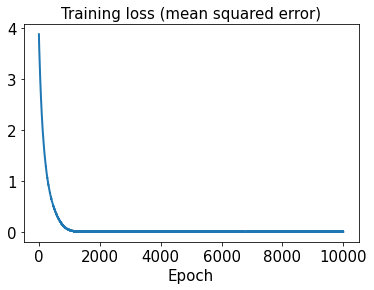

In [84]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

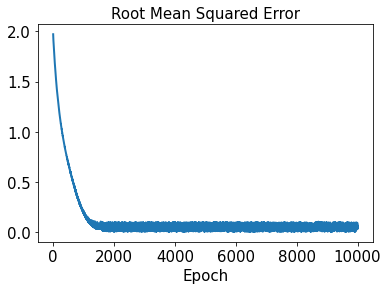

In [85]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [86]:
test_results3 = sd3.evaluate(t_test)

1/1 [==============================] - 0s 92ms/step - loss: 4.7612e-05 - rmse: 0.0000e+00


In [87]:
decoded_train3 = sd3.predict(t_train)

In [88]:
decoded_test3 = sd3.predict(t_test)

In [89]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [90]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [91]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

0.19928746574299241


In [92]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

0.18586097442825808


In [93]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[0.1062984044252202, 0.2353740179474245, 0.06163506208855636, 0.154345383295027, 0.08508535653722182, 0.19459081038004936, 0.11338110308767585, 0.1515080202122101, 0.09966931835608009, 0.1993680645560476, 0.18363025815308304, 0.2894897089516867, 0.07594780071480275, 0.248377843311838, 0.16822138976731188, 0.28852308202402793, 0.11758983386135215, 0.02360329628247759, 0.27979646684703646, 0.13235757348903118, 0.2333321890150807, 0.2696112023910587, 0.2156657658164533, 0.010475791626088155, 0.1657228420064613, 0.18071530837341632, 0.00730654661435183, 0.06918099514946471, 0.0401931435206449, 0.22161599677707353, 0.12612143226767938, 0.09099080940898652, 0.24383567036705858]


In [94]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[0.026071347970186627, 0.13902841796840573, 0.20856007102723212, 0.039159140840829526, 0.2581215124659807, 0.24995095766629796, 0.05279474677019867, 0.24797860323273296]


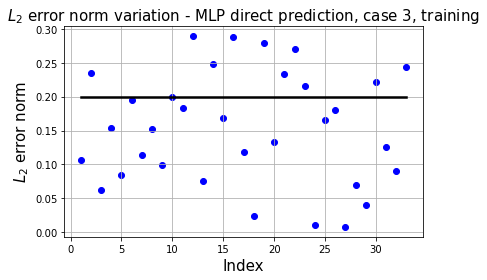

In [95]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

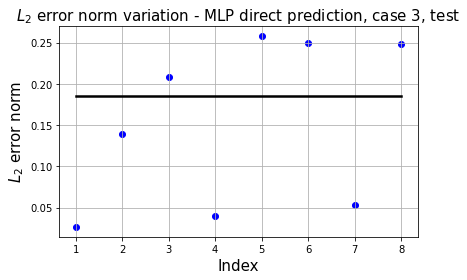

In [96]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

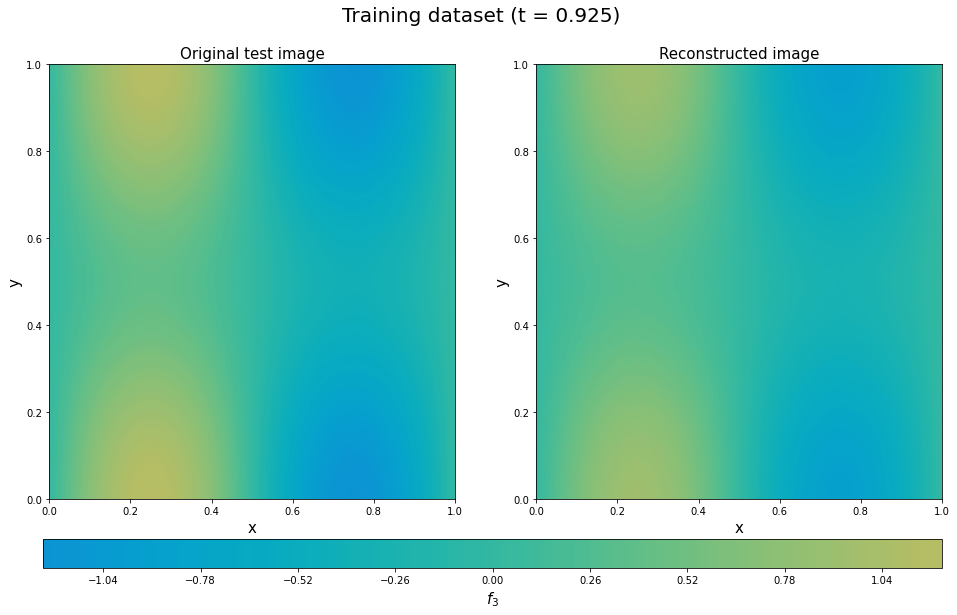

In [97]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

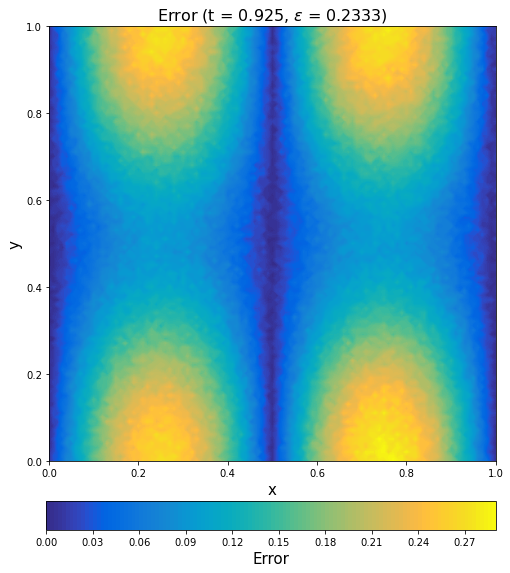

In [98]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

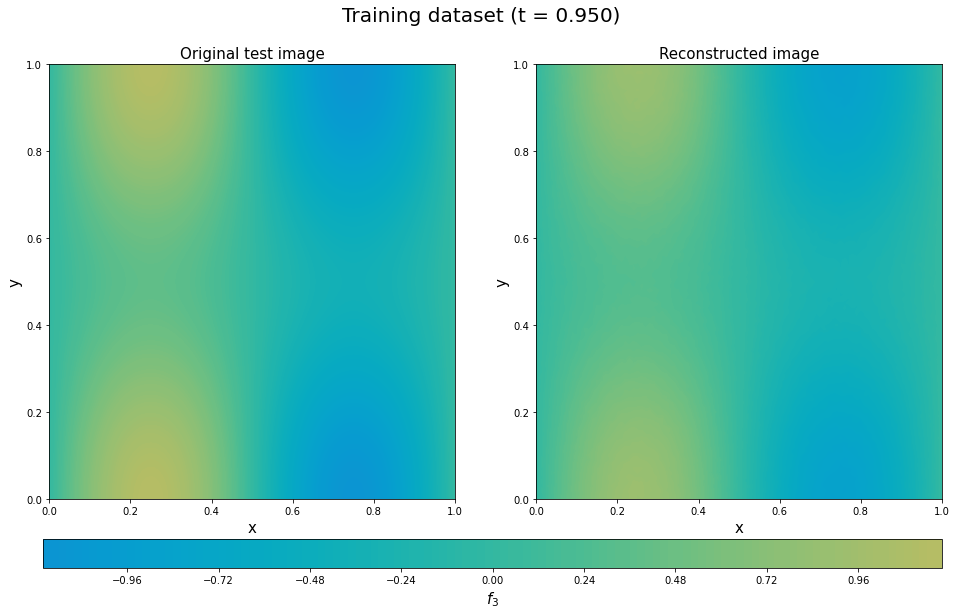

In [99]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

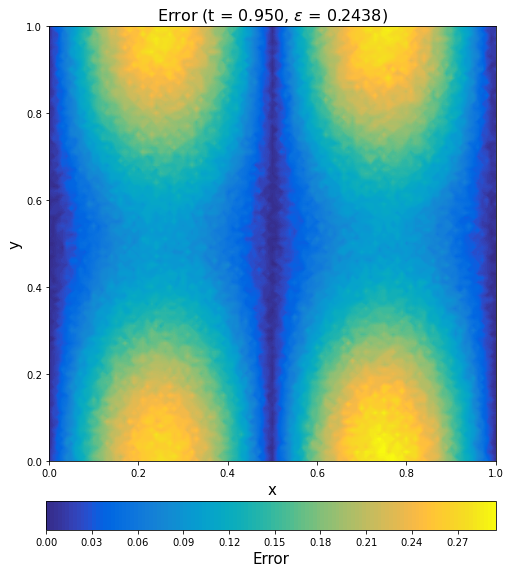

In [100]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

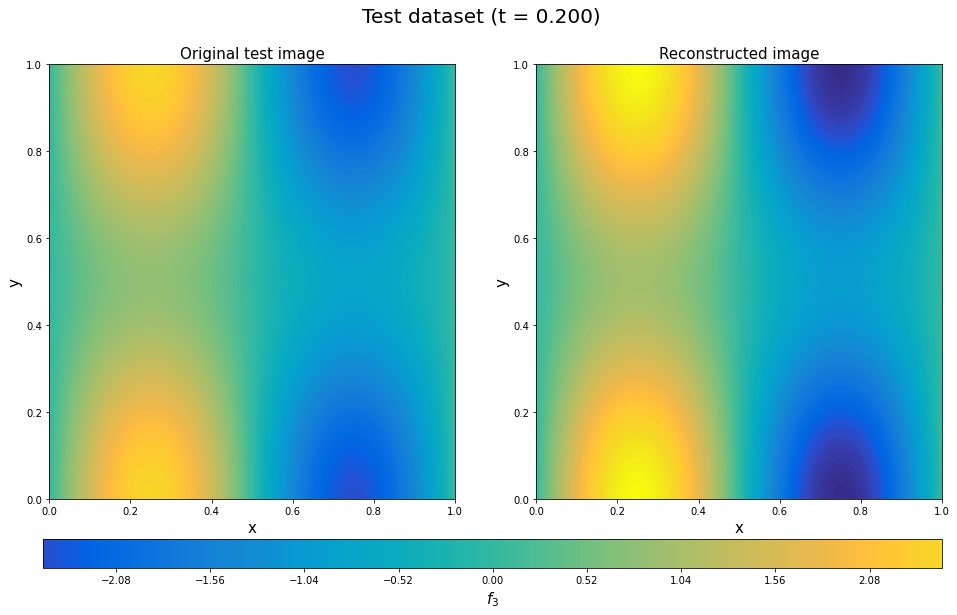

In [101]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

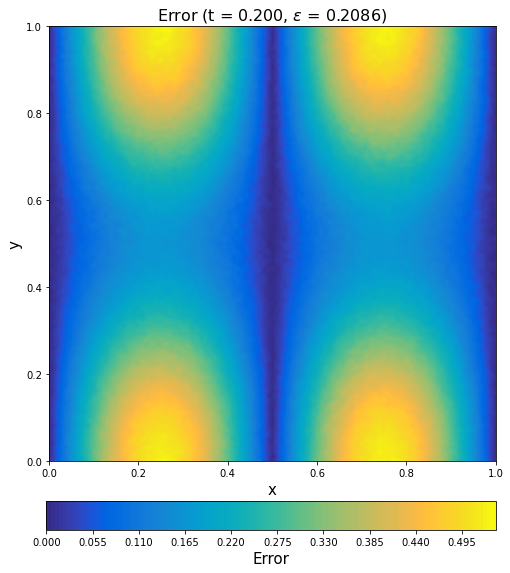

In [102]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

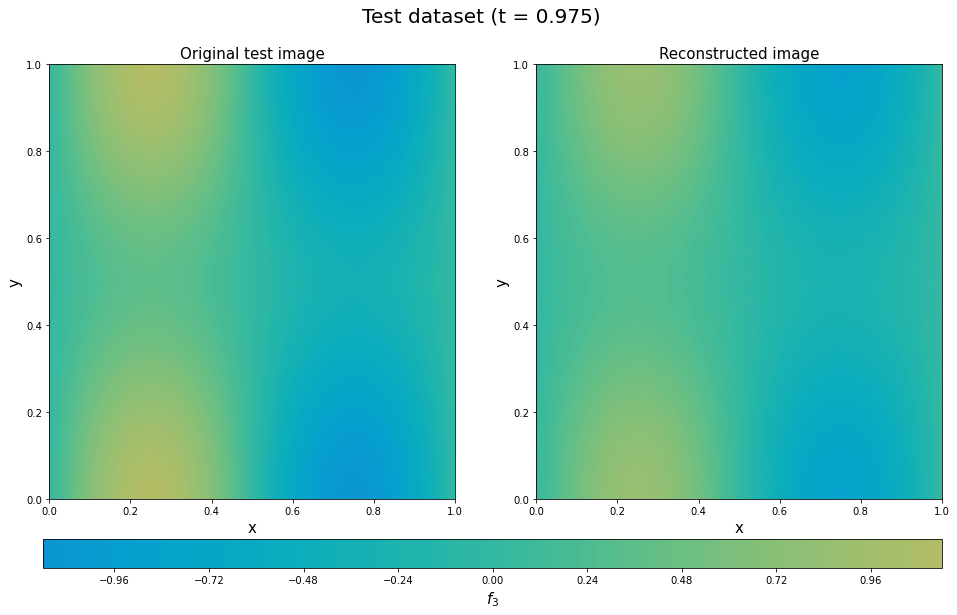

In [103]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

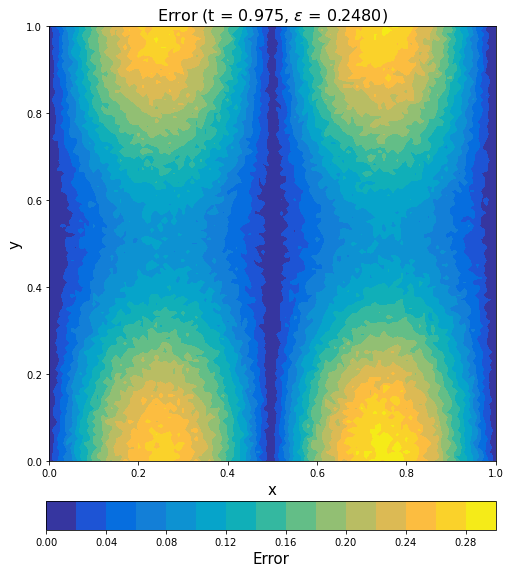

In [104]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()